# In the name of god 
## Hands on Biological Signal Processing - Part 1 

### 1) Effect of Altitude on Human EEG and ECG Signals

Experiment Overview:
The experiment aims to investigate the effects of altitude on human EEG (Electroencephalography) and ECG (Electrocardiography) signals. Two altitudes were chosen for the study: 990 meters and 2700 meters above sea level. During signal recording, a person was exposed to a flashing light stimulus. If the light was red, no reaction was required, but if it was green, the person had to press a button using their right index finger.

Data Collection:
Signals were recorded using electrodes placed at specific positions on the scalp according to the standard 10/20 system for EEG measurement. Specifically, signals were recorded from electrodes 3C and 4C. Additionally, ECG signals were recorded along with information about the flashing light stimulus and the person's button presses.

Data Structure:
Two separate databases were created, each corresponding to one of the altitudes tested. Each database contains multiple trials, with each trial having recordings from five channels: EEG signals from electrodes 3C and 4C (channels 1 and 2), ECG signal (channel 3), flashing light stimulus (channel 4), and button presses (channel 5). The units for EEG signals are microvolts, and the sampling frequency is 256 Hz.

In [1]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl


# Set LaTeX font for all text
mpl.rc('font', family='serif')   # Set serif font
# Set grid properties for all plots
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.alpha'] = 0.8
mpl.rcParams['grid.color'] = 'gray'



In [3]:

# Load data from the .mat file
data_990  = loadmat('EEG_990mS16.mat') 
data_2700 = loadmat('EEG_2700mS16.mat')

In [4]:
type (data_990)

dict

In [5]:
data_990.keys()

dict_keys(['__header__', '__version__', '__globals__', 'y'])

In [6]:
for i in data_990.keys():
    print (np.shape(data_990[i]))

()
()
(0,)
(37, 1536, 5)


In [7]:
Data_channel_names = ['EEG_C3','EEG_C4','ECG','Light_Stimulus','Button_Presses']

In [8]:
# create varibles from datas
for i, channel_name in enumerate(Data_channel_names):
    print (i,channel_name)
    globals()[f"{channel_name}_990"] = data_990['y'][:,:,i]
    globals()[f"{channel_name}_2700"] = data_2700['y'][:,:,i]


0 EEG_C3
1 EEG_C4
2 ECG
3 Light_Stimulus
4 Button_Presses


In [9]:
print (globals().keys())
# so varibles are = 'EEG_C3_990', 'EEG_C3_2700', 'EEG_C4_990', 'EEG_C4_2700', 'ECG_990', 'ECG_2700', 'Light_stimulus_990', 'Light_stimulus_2700', 'Button_Presses_990', 'Button_Presses_2700'

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'np', 'plt', 'loadmat', '_i2', 'mpl', '_i3', 'data_990', 'data_2700', '_i4', '_4', '_i5', '_5', '_i6', 'i', '_i7', 'Data_channel_names', '_i8', 'channel_name', 'EEG_C3_990', 'EEG_C3_2700', 'EEG_C4_990', 'EEG_C4_2700', 'ECG_990', 'ECG_2700', 'Light_Stimulus_990', 'Light_Stimulus_2700', 'Button_Presses_990', 'Button_Presses_2700', '_i9'])


In [10]:
varible_names = ['EEG_C3_990', 'EEG_C3_2700', 'EEG_C4_990', 'EEG_C4_2700', 'ECG_990', 'ECG_2700', 'Light_Stimulus_990', 'Light_Stimulus_2700', 'Button_Presses_990', 'Button_Presses_2700']
for i in varible_names : 
    print ('shape of the variable',i,'is',np.shape (globals()[i]))



shape of the variable EEG_C3_990 is (37, 1536)
shape of the variable EEG_C3_2700 is (41, 1536)
shape of the variable EEG_C4_990 is (37, 1536)
shape of the variable EEG_C4_2700 is (41, 1536)
shape of the variable ECG_990 is (37, 1536)
shape of the variable ECG_2700 is (41, 1536)
shape of the variable Light_Stimulus_990 is (37, 1536)
shape of the variable Light_Stimulus_2700 is (41, 1536)
shape of the variable Button_Presses_990 is (37, 1536)
shape of the variable Button_Presses_2700 is (41, 1536)


In [11]:
# Number of trials
num_trials_990 = 37
num_trials_2700 = 41

# Generate random indices
random_index_990 = np.random.randint(0, num_trials_990)
random_index_2700 = np.random.randint(0, num_trials_2700)

# Print random indices
print("Random index for altitude 990:", random_index_990)
print("Random index for altitude 2700:", random_index_2700)


Random index for altitude 990: 32
Random index for altitude 2700: 5


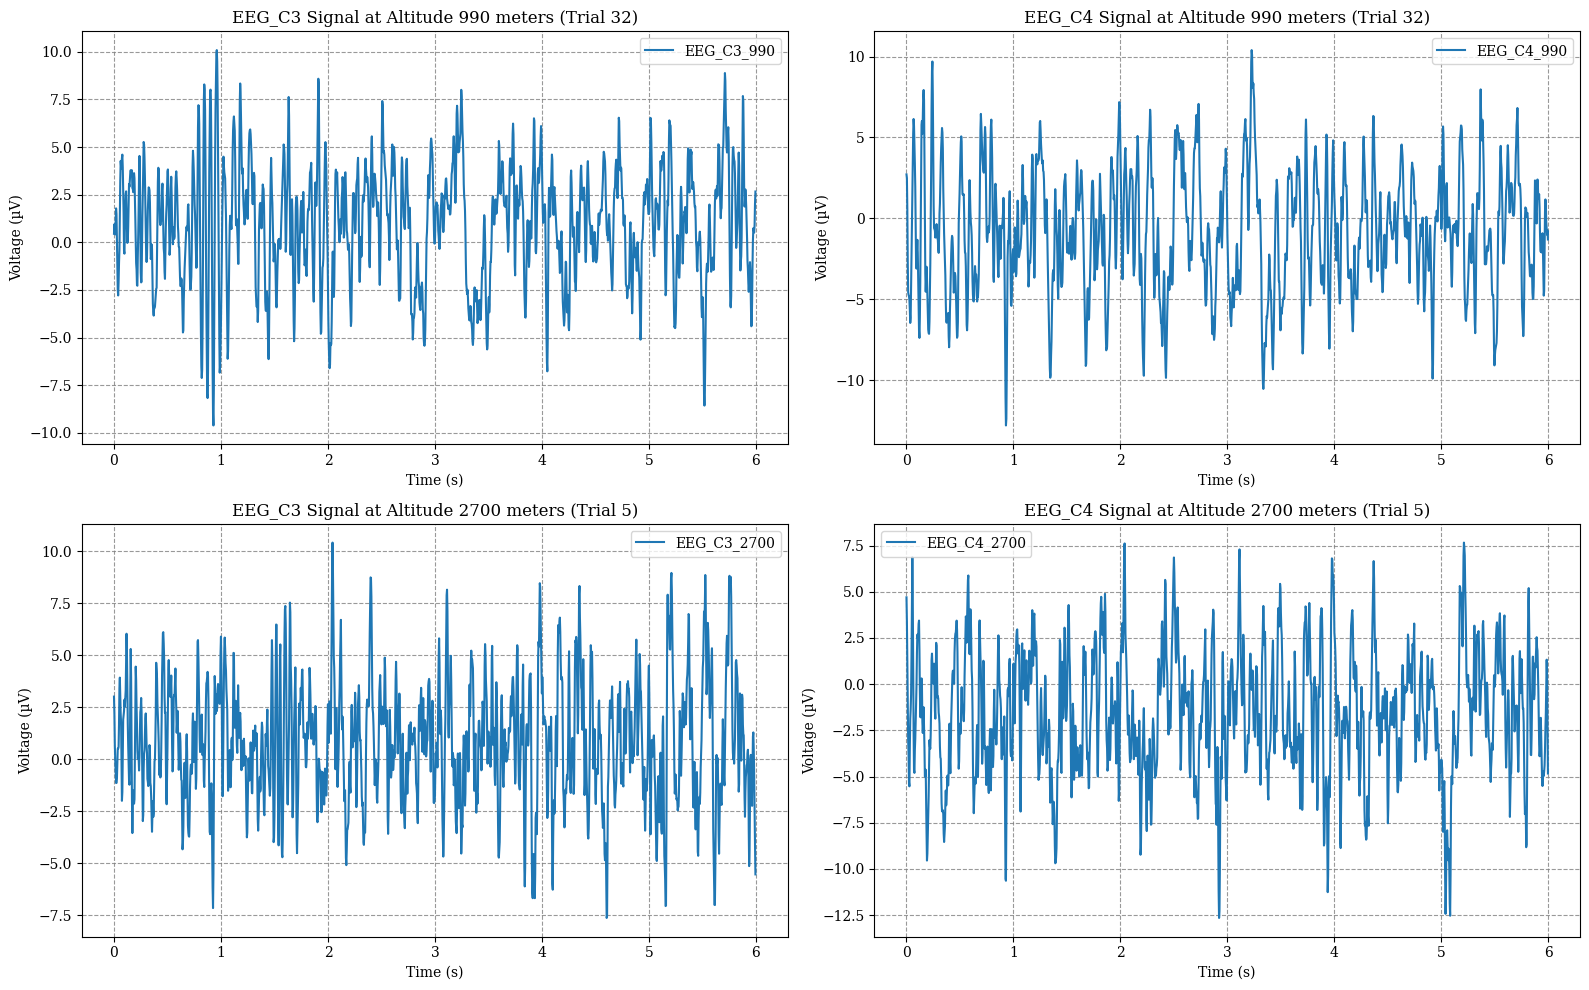

In [12]:
# Sampling frequency (Fs)
Fs = 256

# Number of samples per trial
num_samples = EEG_C3_990.shape[1]  # Assuming all trials have the same number of samples

# Create time vector
time = np.arange(num_samples) / Fs

# Plot EEG signals for randomly selected trials at each altitude
plt.figure(figsize=(16, 10))

# EEG signal for altitude 990 meters
plt.subplot(2, 2, 1)
plt.plot(time, EEG_C3_990[random_index_990], label='EEG_C3_990')
plt.title('EEG_C3 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time, EEG_C4_990[random_index_990], label='EEG_C4_990')
plt.title('EEG_C4 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.legend()

# EEG signal for altitude 2700 meters
plt.subplot(2, 2, 3)
plt.plot(time, EEG_C3_2700[random_index_2700], label='EEG_C3_2700')
plt.title('EEG_C3 Signal at Altitude 2700 meters (Trial {})'.format(random_index_2700))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time, EEG_C4_2700[random_index_2700], label='EEG_C4_2700')
plt.title('EEG_C4 Signal at Altitude 2700 meters (Trial {})'.format(random_index_2700))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Compute FFT for EEG signals
fft_EEG_C3_990 = np.fft.fft(EEG_C3_990[random_index_990])
fft_EEG_C4_990 = np.fft.fft(EEG_C4_990[random_index_990])
fft_EEG_C3_2700 = np.fft.fft(EEG_C3_2700[random_index_2700])
fft_EEG_C4_2700 = np.fft.fft(EEG_C4_2700[random_index_2700])

# Compute frequency axis
freq_axis = np.fft.fftfreq(num_samples, 1/Fs)


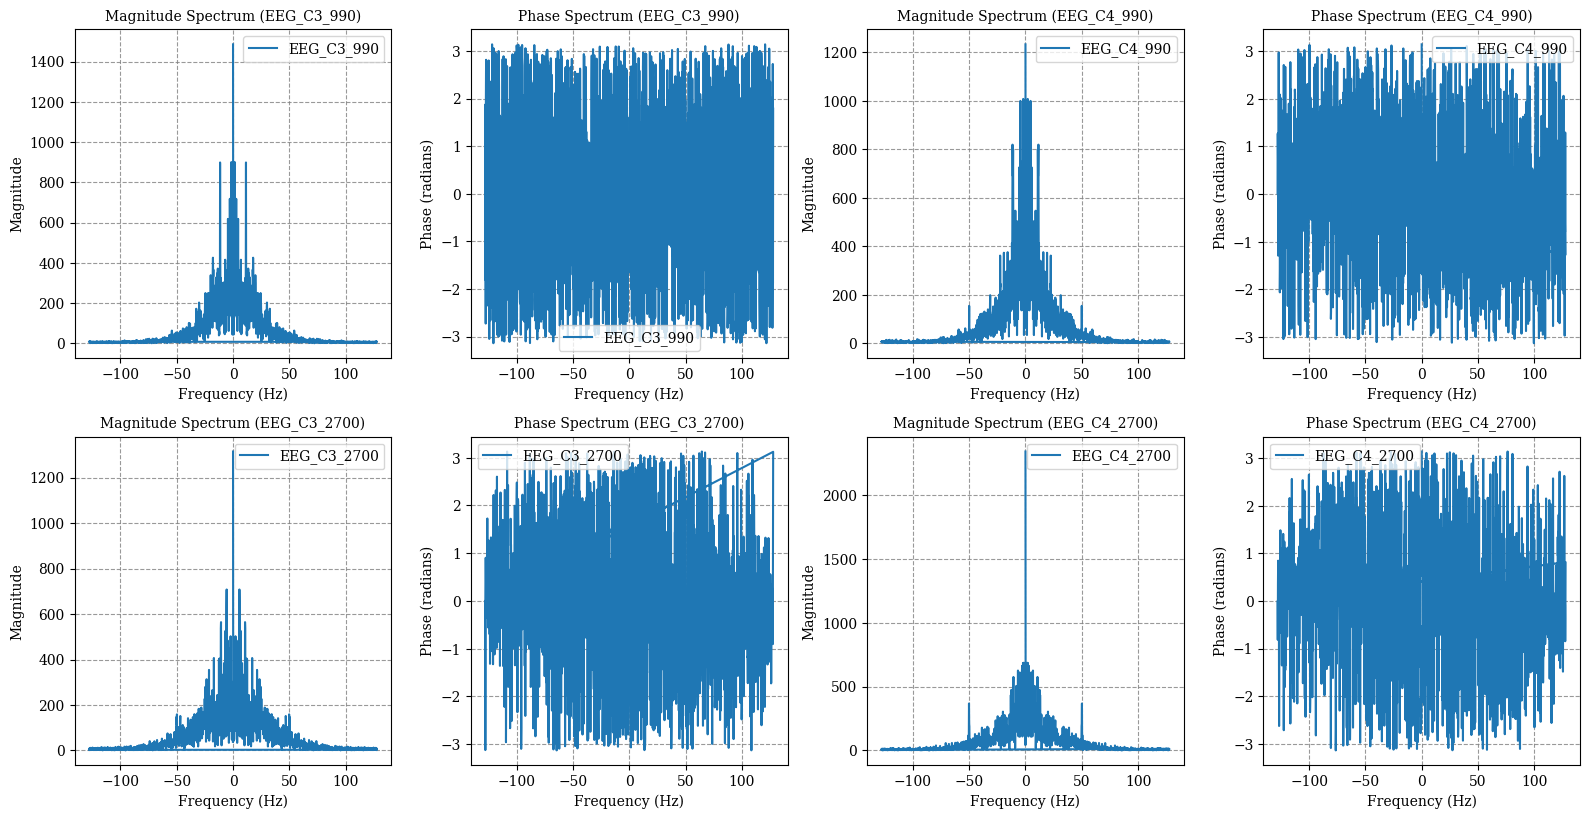

In [14]:
# Plot frequency domain representation
plt.figure(figsize=(16, 16))

# EEG signal for altitude 990 meters (EEG_C3)
plt.subplot(4, 4, 1)
plt.plot(freq_axis, np.abs(fft_EEG_C3_990), label='EEG_C3_990')
plt.title('Magnitude Spectrum ({})'.format('EEG_C3_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 2)
plt.plot(freq_axis, np.angle(fft_EEG_C3_990), label='EEG_C3_990')
plt.title('Phase Spectrum ({})'.format('EEG_C3_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 990 meters (EEG_C4)
plt.subplot(4, 4, 3)
plt.plot(freq_axis, np.abs(fft_EEG_C4_990), label='EEG_C4_990')
plt.title('Magnitude Spectrum ({})'.format('EEG_C4_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 4)
plt.plot(freq_axis, np.angle(fft_EEG_C4_990), label='EEG_C4_990')
plt.title('Phase Spectrum ({})'.format('EEG_C4_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C3)
plt.subplot(4, 4, 5)
plt.plot(freq_axis, np.abs(fft_EEG_C3_2700), label='EEG_C3_2700')
plt.title('Magnitude Spectrum ({})'.format('EEG_C3_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 6)
plt.plot(freq_axis, np.angle(fft_EEG_C3_2700), label='EEG_C3_2700')
plt.title('Phase Spectrum ({})'.format('EEG_C3_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C4)
plt.subplot(4, 4, 7)
plt.plot(freq_axis, np.abs(fft_EEG_C4_2700), label='EEG_C4_2700')
plt.title('Magnitude Spectrum ({})'.format('EEG_C4_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 8)
plt.plot(freq_axis, np.angle(fft_EEG_C4_2700), label='EEG_C4_2700')
plt.title('Phase Spectrum ({})'.format('EEG_C4_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

plt.tight_layout()
plt.show()


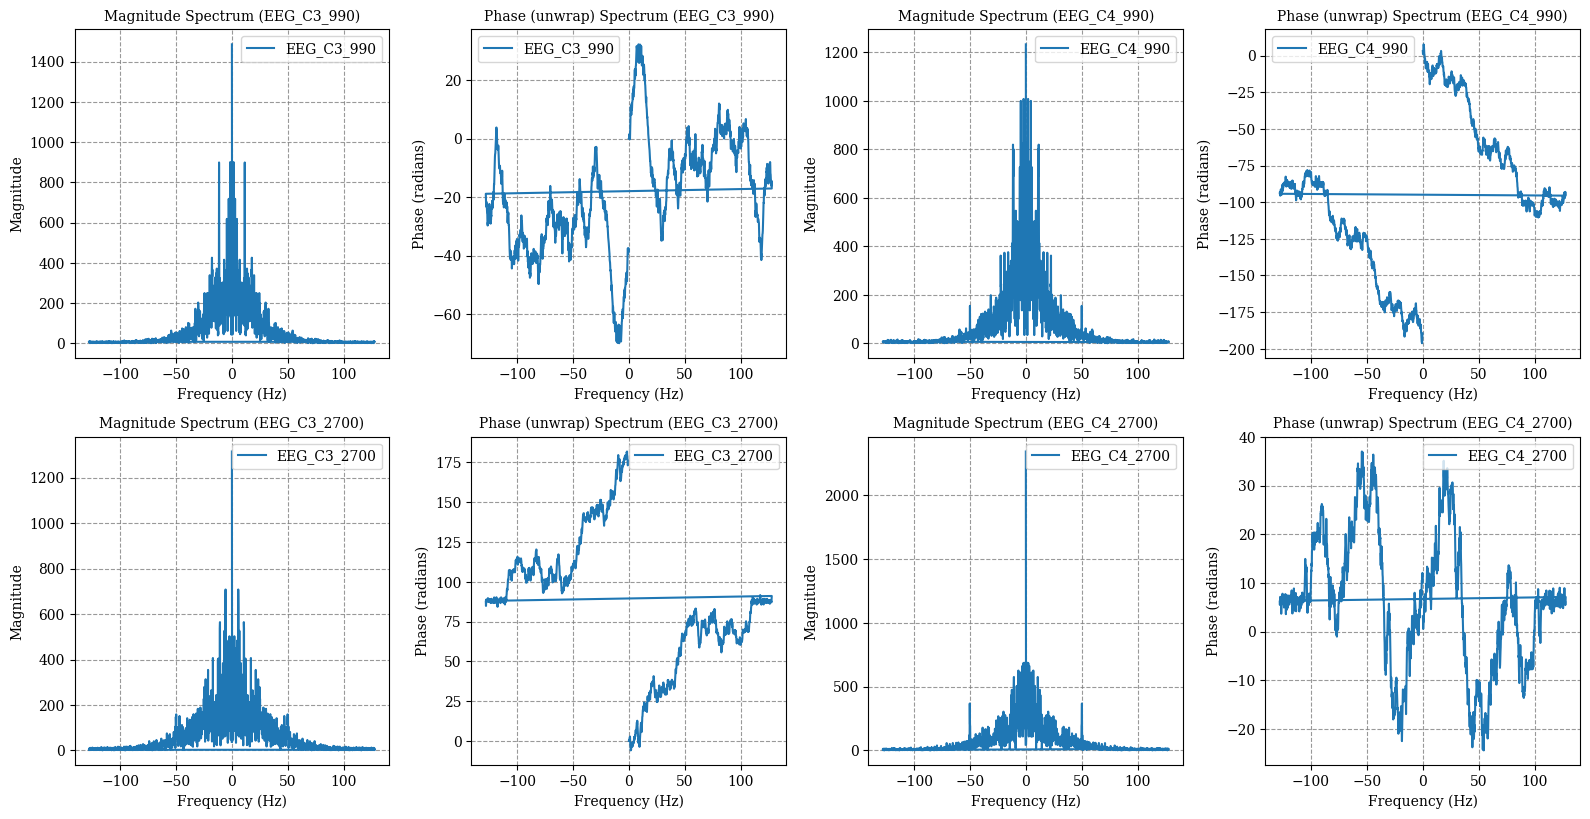

In [15]:
# Plot frequency domain representation
plt.figure(figsize=(16, 16))

# EEG signal for altitude 990 meters (EEG_C3)
plt.subplot(4, 4, 1)
plt.plot(freq_axis, np.abs(fft_EEG_C3_990), label='EEG_C3_990')
plt.title('Magnitude Spectrum ({})'.format('EEG_C3_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 2)
plt.plot(freq_axis, np.unwrap(np.angle(fft_EEG_C3_990)), label='EEG_C3_990')
plt.title('Phase (unwrap) Spectrum ({})'.format('EEG_C3_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 990 meters (EEG_C4)
plt.subplot(4, 4, 3)
plt.plot(freq_axis, np.abs(fft_EEG_C4_990), label='EEG_C4_990')
plt.title('Magnitude Spectrum ({})'.format('EEG_C4_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 4)
plt.plot(freq_axis, np.unwrap(np.angle(fft_EEG_C4_990)), label='EEG_C4_990')
plt.title('Phase (unwrap) Spectrum ({})'.format('EEG_C4_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C3)
plt.subplot(4, 4, 5)
plt.plot(freq_axis, np.abs(fft_EEG_C3_2700), label='EEG_C3_2700')
plt.title('Magnitude Spectrum ({})'.format('EEG_C3_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 6)
plt.plot(freq_axis, np.unwrap(np.angle(fft_EEG_C3_2700)), label='EEG_C3_2700')
plt.title('Phase (unwrap) Spectrum ({})'.format('EEG_C3_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C4)
plt.subplot(4, 4, 7)
plt.plot(freq_axis, np.abs(fft_EEG_C4_2700), label='EEG_C4_2700')
plt.title('Magnitude Spectrum ({})'.format('EEG_C4_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 8)
plt.plot(freq_axis, np.unwrap(np.angle(fft_EEG_C4_2700)), label='EEG_C4_2700')
plt.title('Phase (unwrap) Spectrum ({})'.format('EEG_C4_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

plt.tight_layout()
plt.show()


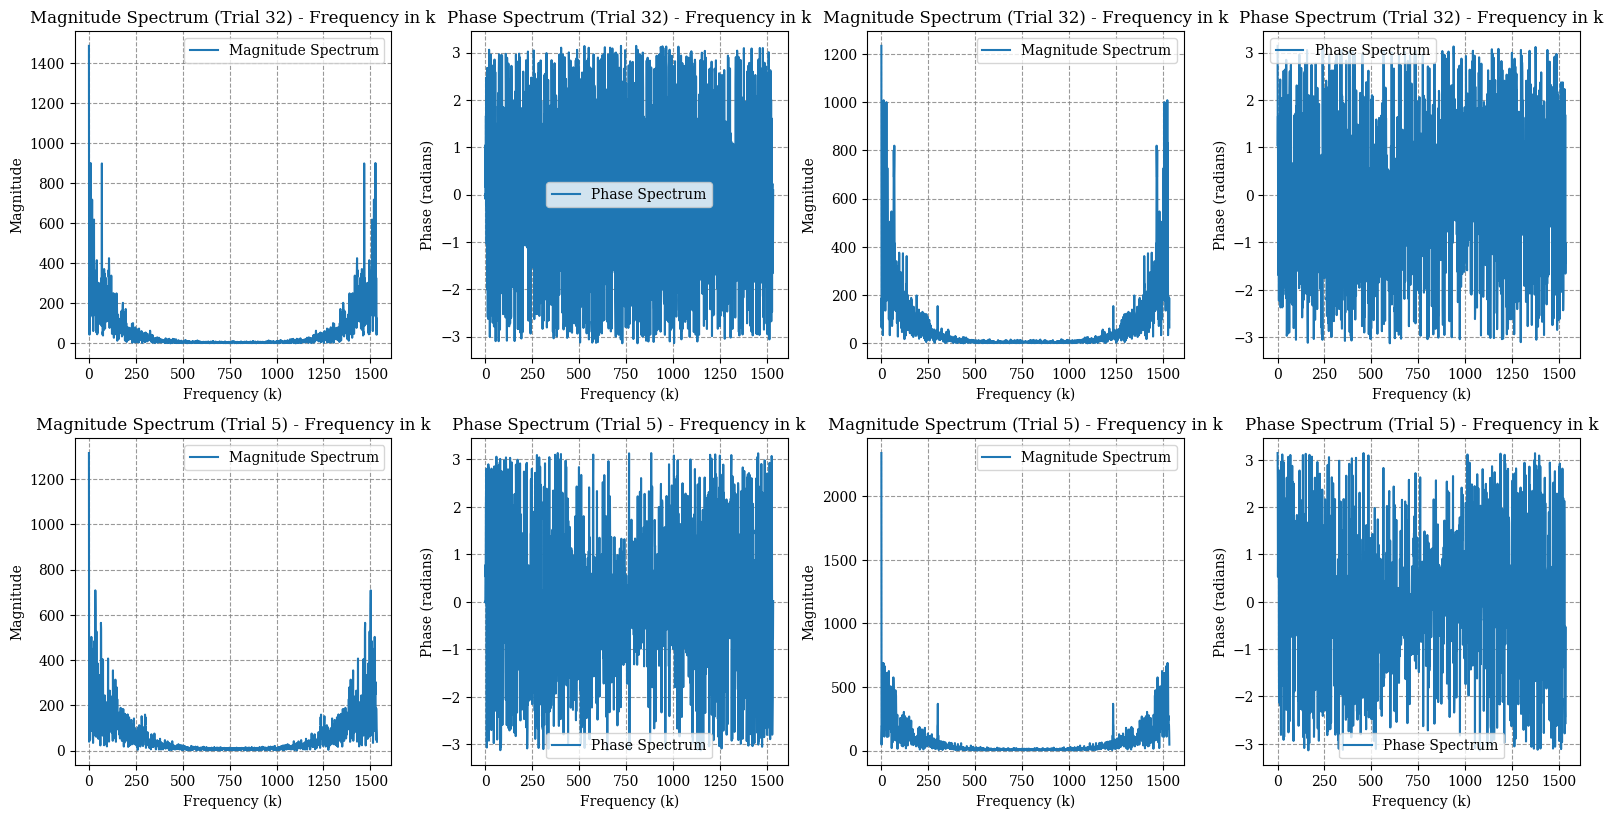

In [16]:
# Plot FFT domain representation with frequency axis in terms of sample indices (k)
plt.figure(figsize=(16, 16))

# EEG signal for altitude 990 meters (EEG_C3)
plt.subplot(4, 4, 1)
plt.plot(np.arange(len(fft_EEG_C3_990)), np.abs(fft_EEG_C3_990), label='Magnitude Spectrum')
plt.title('Magnitude Spectrum (Trial {}) - Frequency in k'.format(random_index_990))
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 2)
plt.plot(np.arange(len(fft_EEG_C3_990)), np.angle(fft_EEG_C3_990), label='Phase Spectrum')
plt.title('Phase Spectrum (Trial {}) - Frequency in k'.format(random_index_990))
plt.xlabel('Frequency (k)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 990 meters (EEG_C4)
plt.subplot(4, 4, 3)
plt.plot(np.arange(len(fft_EEG_C4_990)), np.abs(fft_EEG_C4_990), label='Magnitude Spectrum')
plt.title('Magnitude Spectrum (Trial {}) - Frequency in k'.format(random_index_990))
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 4)
plt.plot(np.arange(len(fft_EEG_C4_990)), np.angle(fft_EEG_C4_990), label='Phase Spectrum')
plt.title('Phase Spectrum (Trial {}) - Frequency in k'.format(random_index_990))
plt.xlabel('Frequency (k)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C3)
plt.subplot(4, 4, 5)
plt.plot(np.arange(len(fft_EEG_C3_2700)), np.abs(fft_EEG_C3_2700), label='Magnitude Spectrum')
plt.title('Magnitude Spectrum (Trial {}) - Frequency in k'.format(random_index_2700))
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 6)
plt.plot(np.arange(len(fft_EEG_C3_2700)), np.angle(fft_EEG_C3_2700), label='Phase Spectrum')
plt.title('Phase Spectrum (Trial {}) - Frequency in k'.format(random_index_2700))
plt.xlabel('Frequency (k)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C4)
plt.subplot(4, 4, 7)
plt.plot(np.arange(len(fft_EEG_C4_2700)), np.abs(fft_EEG_C4_2700), label='Magnitude Spectrum')
plt.title('Magnitude Spectrum (Trial {}) - Frequency in k'.format(random_index_2700))
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 8)
plt.plot(np.arange(len(fft_EEG_C4_2700)), np.angle(fft_EEG_C4_2700), label='Phase Spectrum')
plt.title('Phase Spectrum (Trial {}) - Frequency in k'.format(random_index_2700))
plt.xlabel('Frequency (k)')
plt.ylabel('Phase (radians)')
plt.legend()

plt.tight_layout()
plt.show()


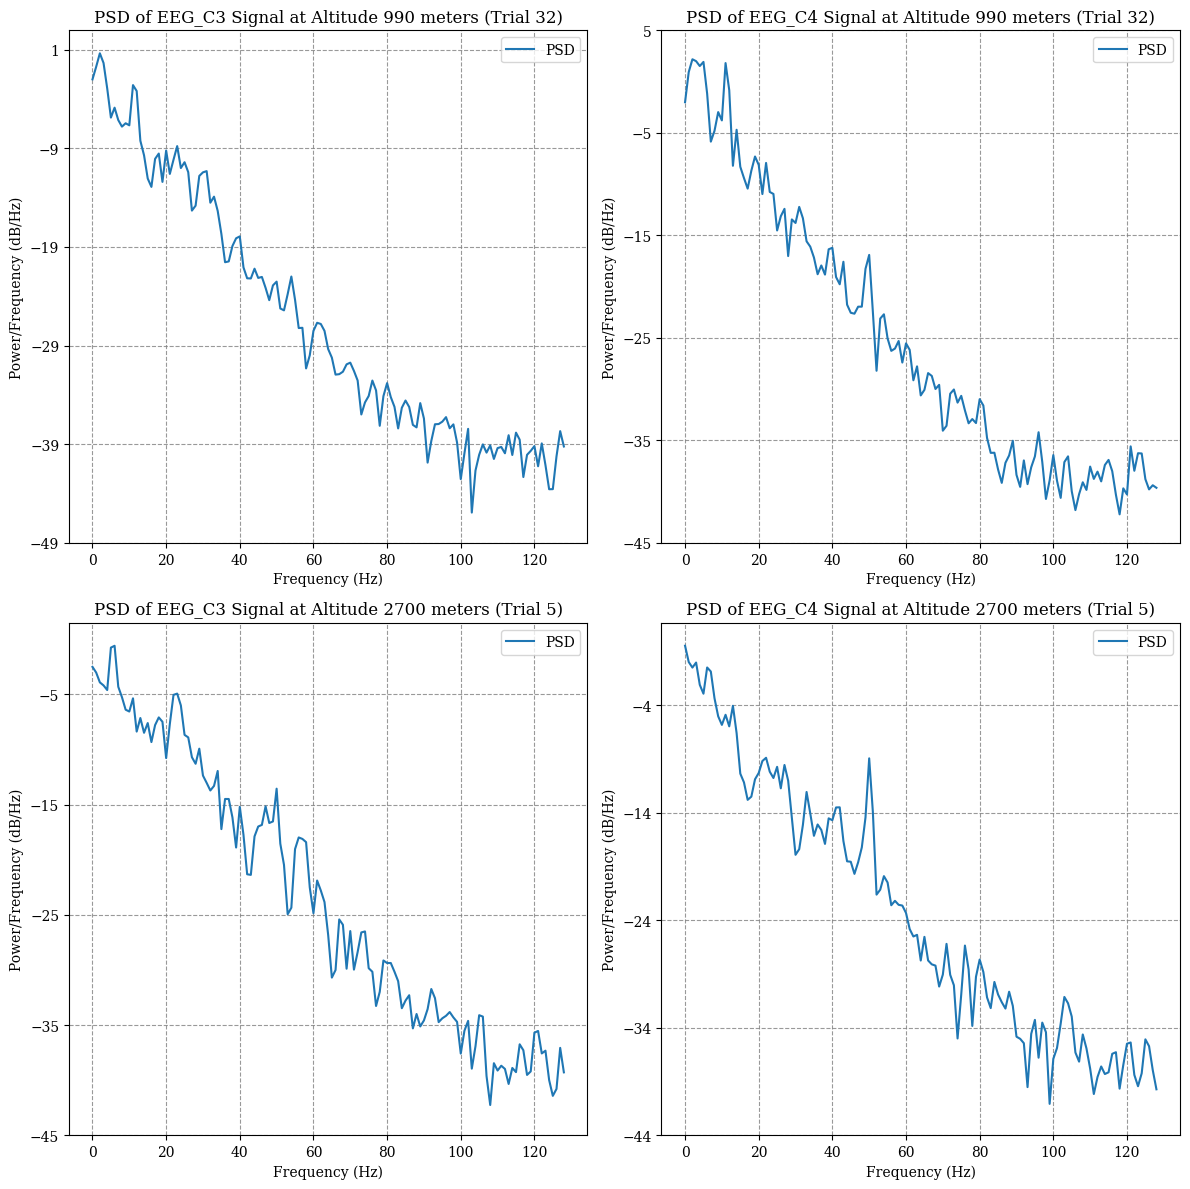

In [17]:
# Plot Power Spectral Density (PSD) with frequency axis in Hertz
plt.figure(figsize=(12, 12))

# EEG signal for altitude 990 meters (EEG_C3)
plt.subplot(2, 2, 1)
plt.psd(EEG_C3_990[random_index_990], Fs=Fs, label='PSD')
plt.title('PSD of EEG_C3 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()

plt.subplot(2, 2, 2)
plt.psd(EEG_C4_990[random_index_990], Fs=Fs, label='PSD')
plt.title('PSD of EEG_C4 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C3)
plt.subplot(2, 2, 3)
plt.psd(EEG_C3_2700[random_index_2700], Fs=Fs, label='PSD')
plt.title('PSD of EEG_C3 Signal at Altitude 2700 meters (Trial {})'.format(random_index_2700))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()

plt.subplot(2, 2, 4)
plt.psd(EEG_C4_2700[random_index_2700], Fs=Fs, label='PSD')
plt.title('PSD of EEG_C4 Signal at Altitude 2700 meters (Trial {})'.format(random_index_2700))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
EEG_C3_990[random_index_990].shape

(1536,)

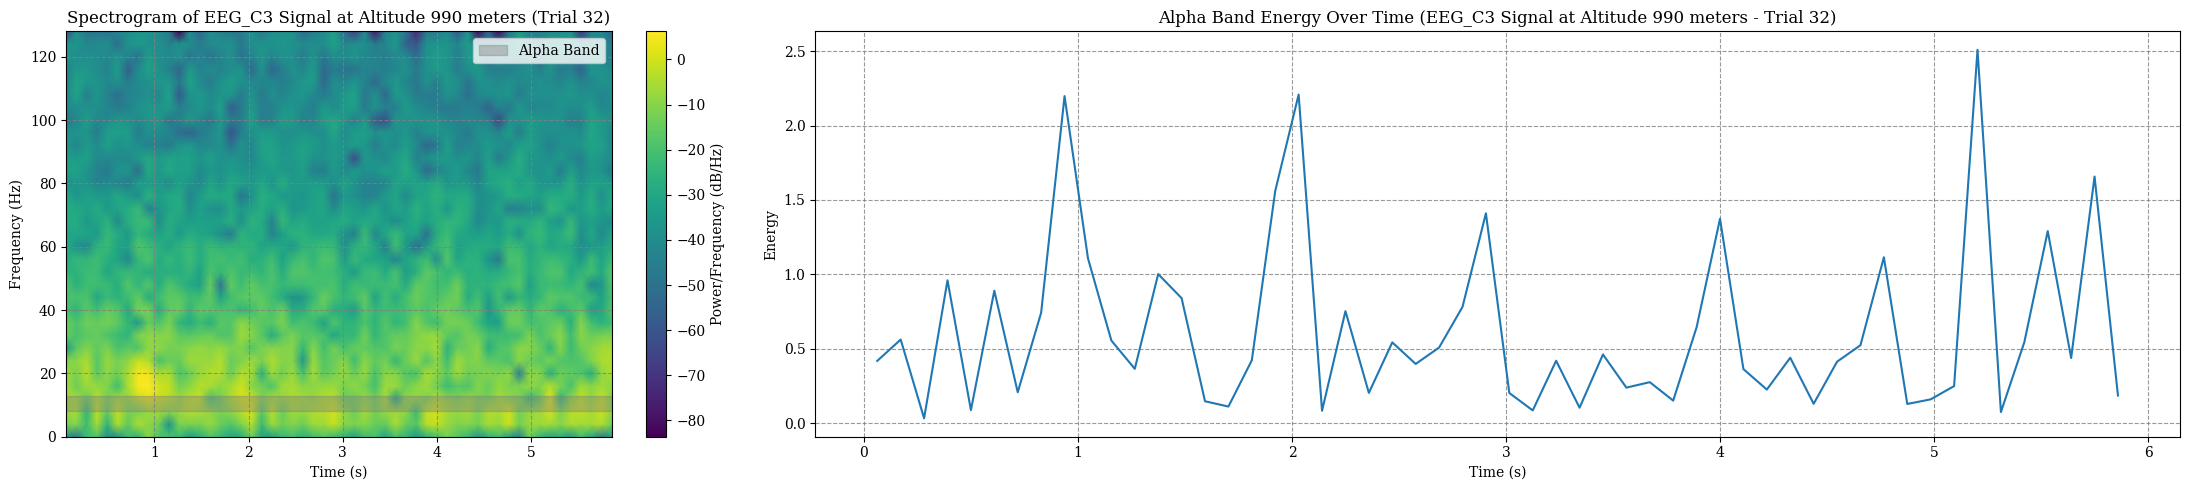

(33, 54)


In [19]:
from scipy.signal import spectrogram , get_window

# Define the frequency range for the alpha band
alpha_band_freq_range = (8, 13)

# Compute the spectrogram for EEG_C3 signals at altitude 990 meters
frequencies, times, Sxx = spectrogram(EEG_C3_990[random_index_990], fs=Fs,nperseg=32, nfft=64)

# Find the indices corresponding to the alpha band frequencies
alpha_band_indices = np.where((frequencies >= alpha_band_freq_range[0]) & (frequencies <= alpha_band_freq_range[1]))[0]

# Compute the energy within the alpha band frequency range over time
alpha_band_energy = np.sum(Sxx[alpha_band_indices, :], axis=0)



# Create a figure with a 1x2 grid, with the second subplot having more width
fig = plt.figure(figsize=(22, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])

# Plot the spectrogram
ax0 = fig.add_subplot(gs[0, 0])
pcm = ax0.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
ax0.set_title('Spectrogram of EEG_C3 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Frequency (Hz)')
ax0.axhspan(alpha_band_freq_range[0], alpha_band_freq_range[1], color='gray', alpha=0.4, label='Alpha Band')
ax0.legend()
ax0.grid(True)
plt.colorbar(pcm, ax=ax0, label='Power/Frequency (dB/Hz)')

# Plot the alpha band energy over time
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(times, alpha_band_energy)
ax1.set_title('Alpha Band Energy Over Time (EEG_C3 Signal at Altitude 990 meters - Trial {})'.format(random_index_990))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Energy')
ax1.grid(True)

plt.tight_layout()
plt.show()


print(np.shape(Sxx))

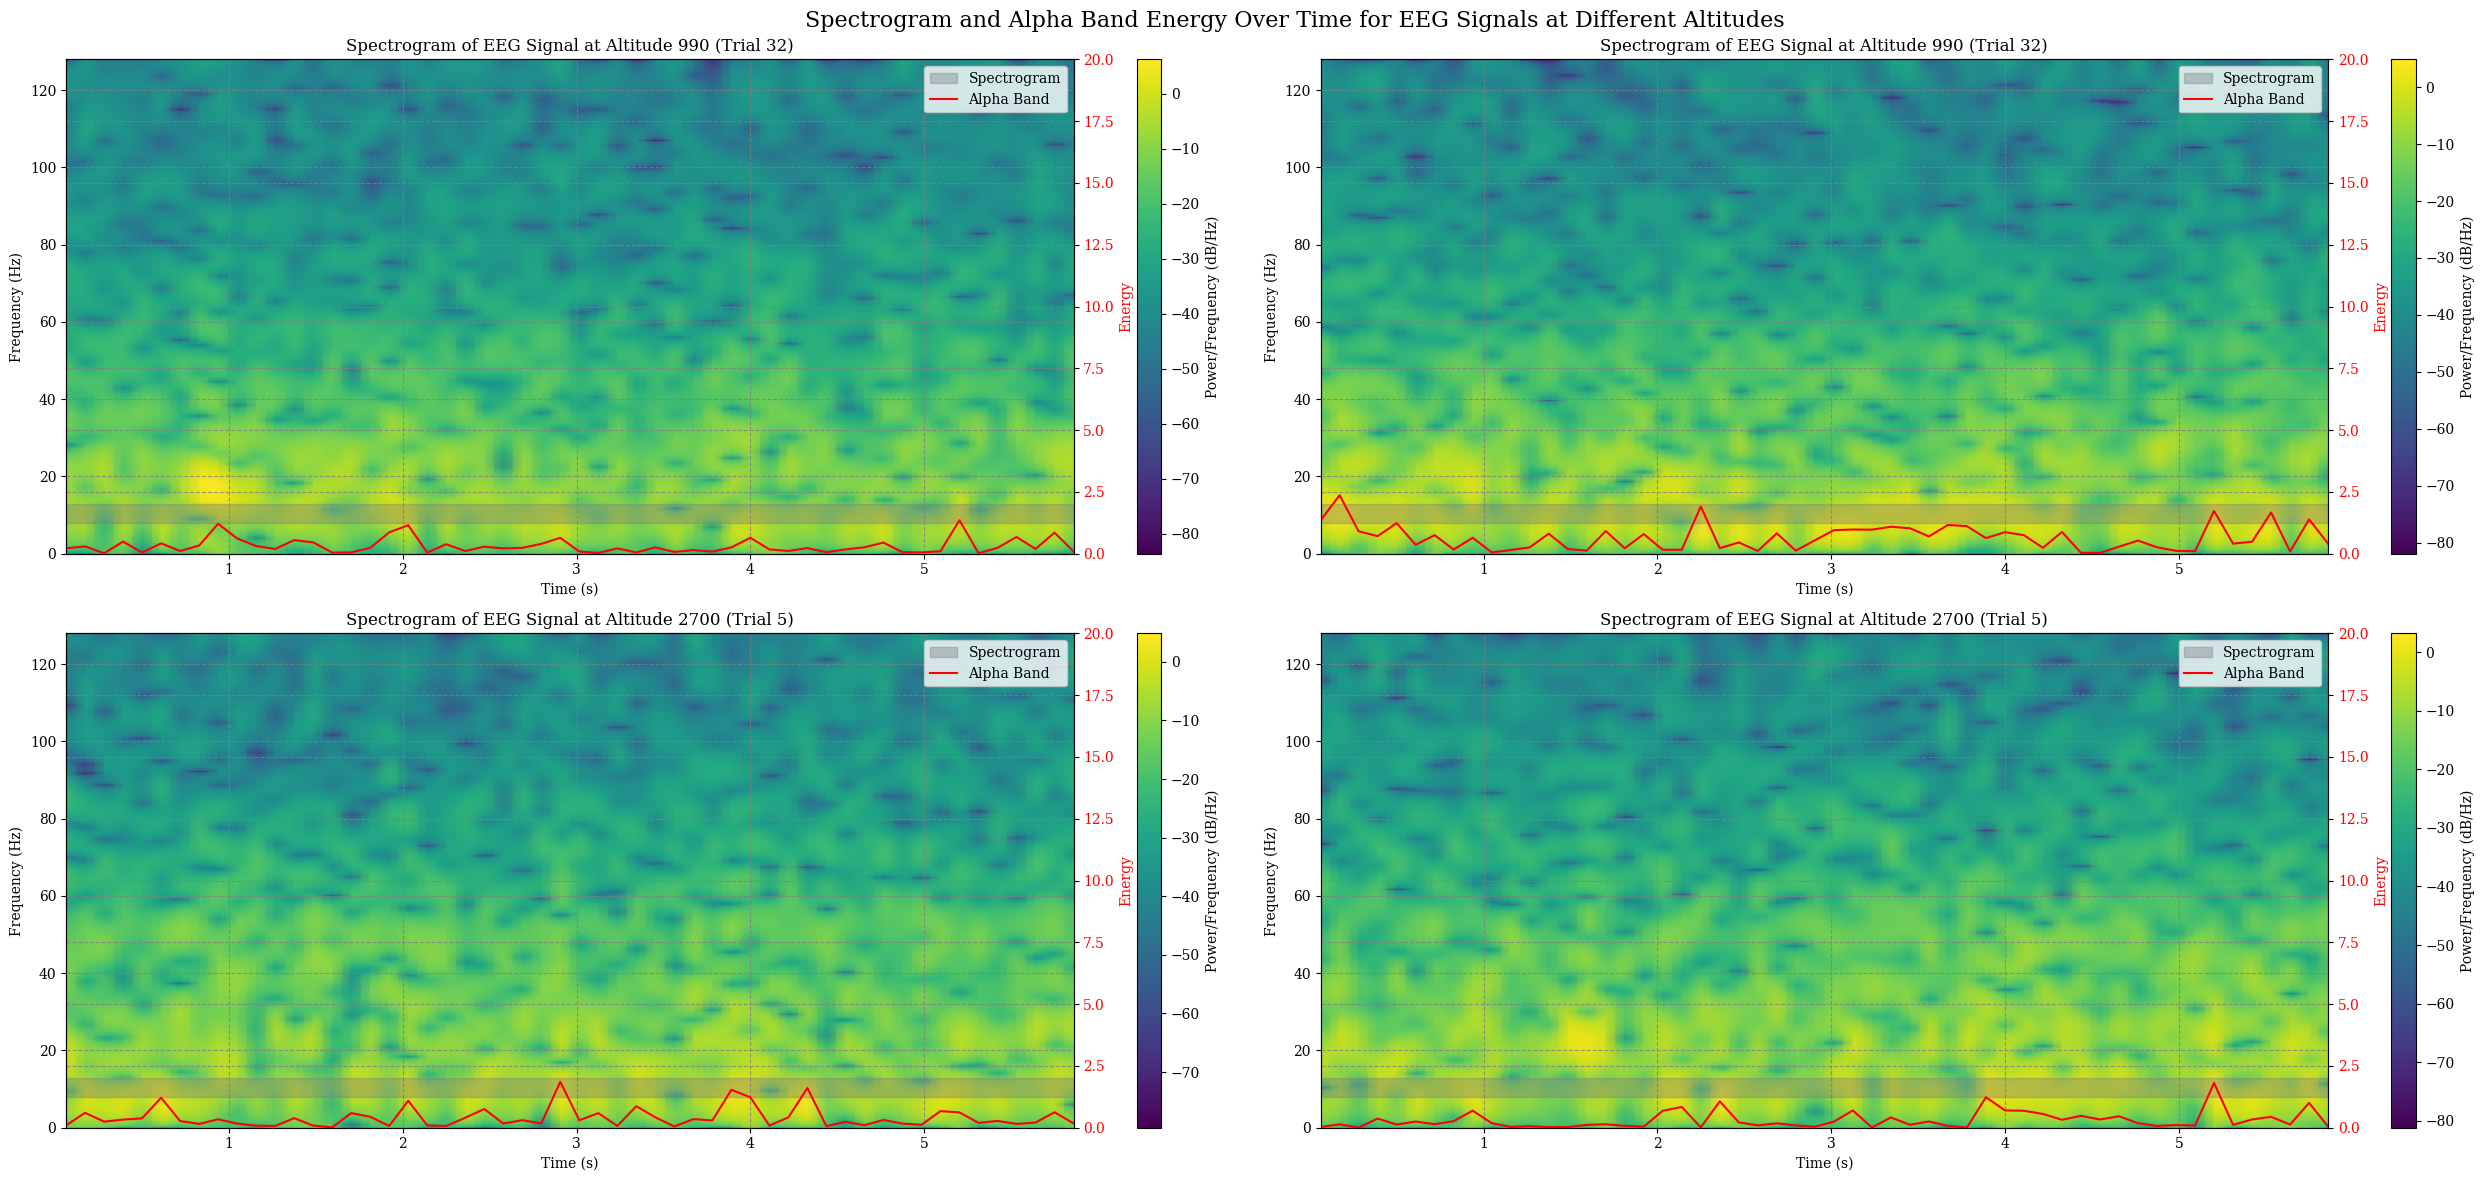

In [20]:
from scipy.signal import spectrogram, get_window

# Define the frequency range for the alpha band
alpha_band_freq_range = (8, 13)

# Define EEG signals and their altitudes
EEG_signals = [EEG_C3_990[random_index_990], EEG_C4_990[random_index_990], EEG_C4_2700[random_index_2700], EEG_C3_2700[random_index_2700]]
altitudes = ['Altitude 990', 'Altitude 990', 'Altitude 2700', 'Altitude 2700']

# Create a figure with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(26, 12))
combined_legend_handles = []  # To store handles for the combined legend
plt.subplots_adjust(hspace=15)

# Iterate over EEG signals and altitudes
for i, (signal, altitude) in enumerate(zip(EEG_signals, altitudes)):

    # Compute the spectrogram
    frequencies, times, Sxx = spectrogram(signal, fs=Fs, nperseg=32 , nfft=signal.shape[0])
    
    # Find the indices corresponding to the alpha band frequencies
    alpha_band_indices = np.where((frequencies >= alpha_band_freq_range[0]) & (frequencies <= alpha_band_freq_range[1]))[0]
    
    # Compute the energy within the alpha band frequency range over time
    alpha_band_energy = np.sum(Sxx[alpha_band_indices, :], axis=0)/Sxx[alpha_band_indices, :].shape[0]
    
    # Plot the spectrogram
    pcm = axs[i // 2, i % 2].pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
    axs[i // 2, i % 2].set_title('Spectrogram of EEG Signal at {} (Trial {})'.format(altitude, random_index_990 if i < 2 else random_index_2700))
    axs[i // 2, i % 2].set_xlabel('Time (s)')
    axs[i // 2, i % 2].set_ylabel('Frequency (Hz)')
    axs[i // 2, i % 2].axhspan(alpha_band_freq_range[0], alpha_band_freq_range[1], color='gray', alpha=0.4, label='Alpha Band')
    plt.colorbar(pcm, ax=axs[i // 2, i % 2], label='Power/Frequency (dB/Hz)')
    

    # Plot the alpha band energy over time
    ax1 = axs[i // 2, i % 2].twinx()
    ax1.plot(times, alpha_band_energy, color='red', label='Alpha Band Energy')
    ax1.set_ylabel('Energy', color='red')
    ax1.set_ylim((0,20))
    ax1.tick_params(axis='y', labelcolor='red')
    # Store handles for legend
    handles1, labels1 = axs[i // 2, i % 2].get_legend_handles_labels()
    handles2, labels2 = ax1.get_legend_handles_labels()
    combined_legend_handles.extend(handles1 + handles2)
    ax1.legend(combined_legend_handles, ['Spectrogram', 'Alpha Band'], loc='upper right')

# Combine legends
plt.suptitle('Spectrogram and Alpha Band Energy Over Time for EEG Signals at Different Altitudes', fontsize=16)
plt.tight_layout()
plt.show()







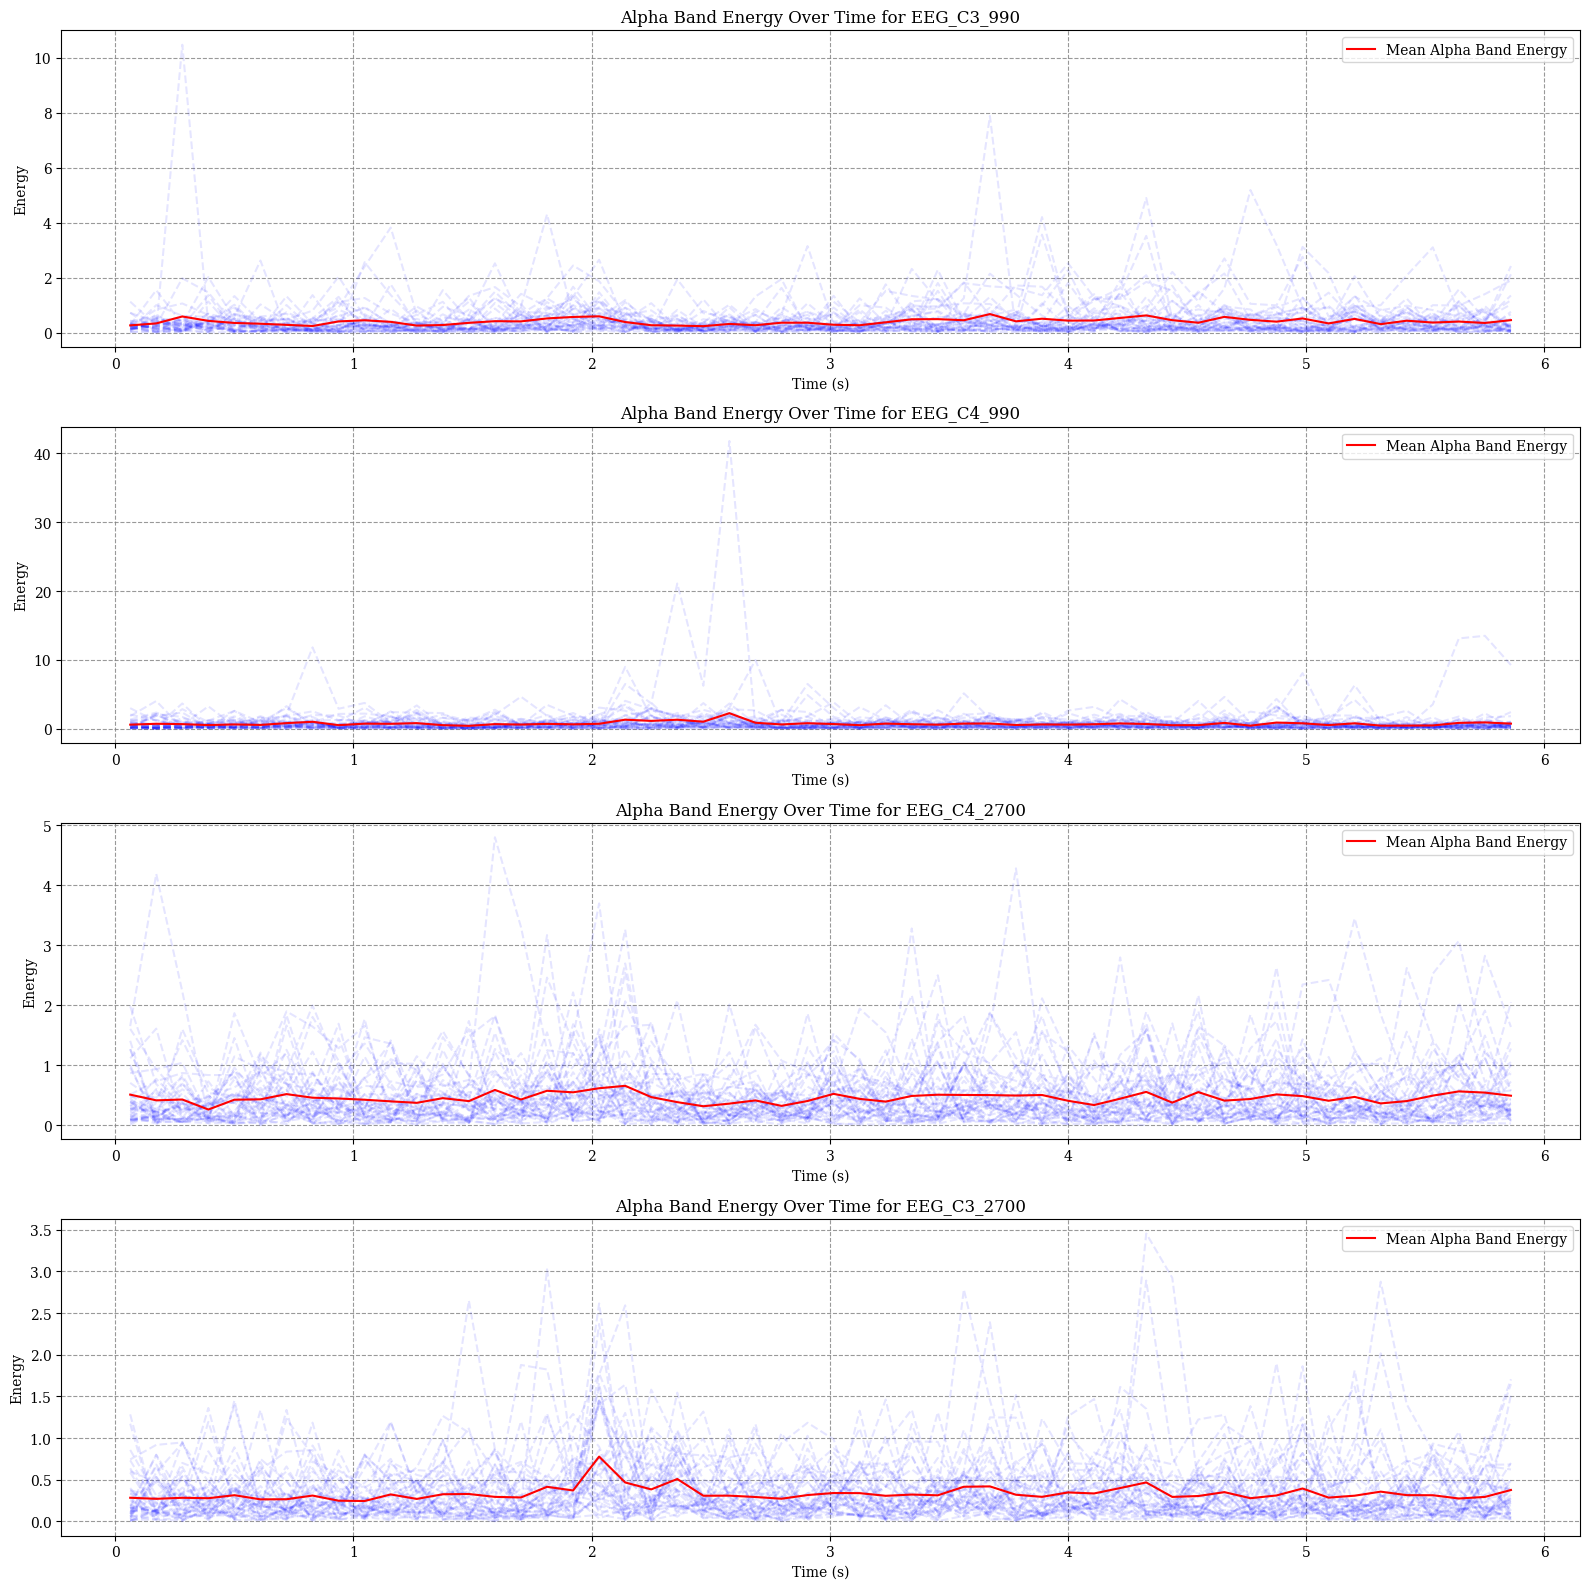

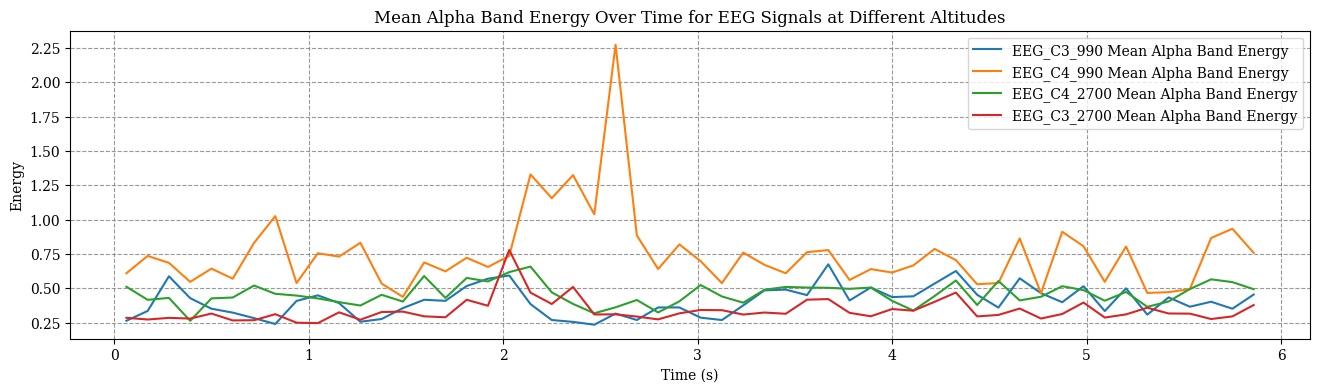

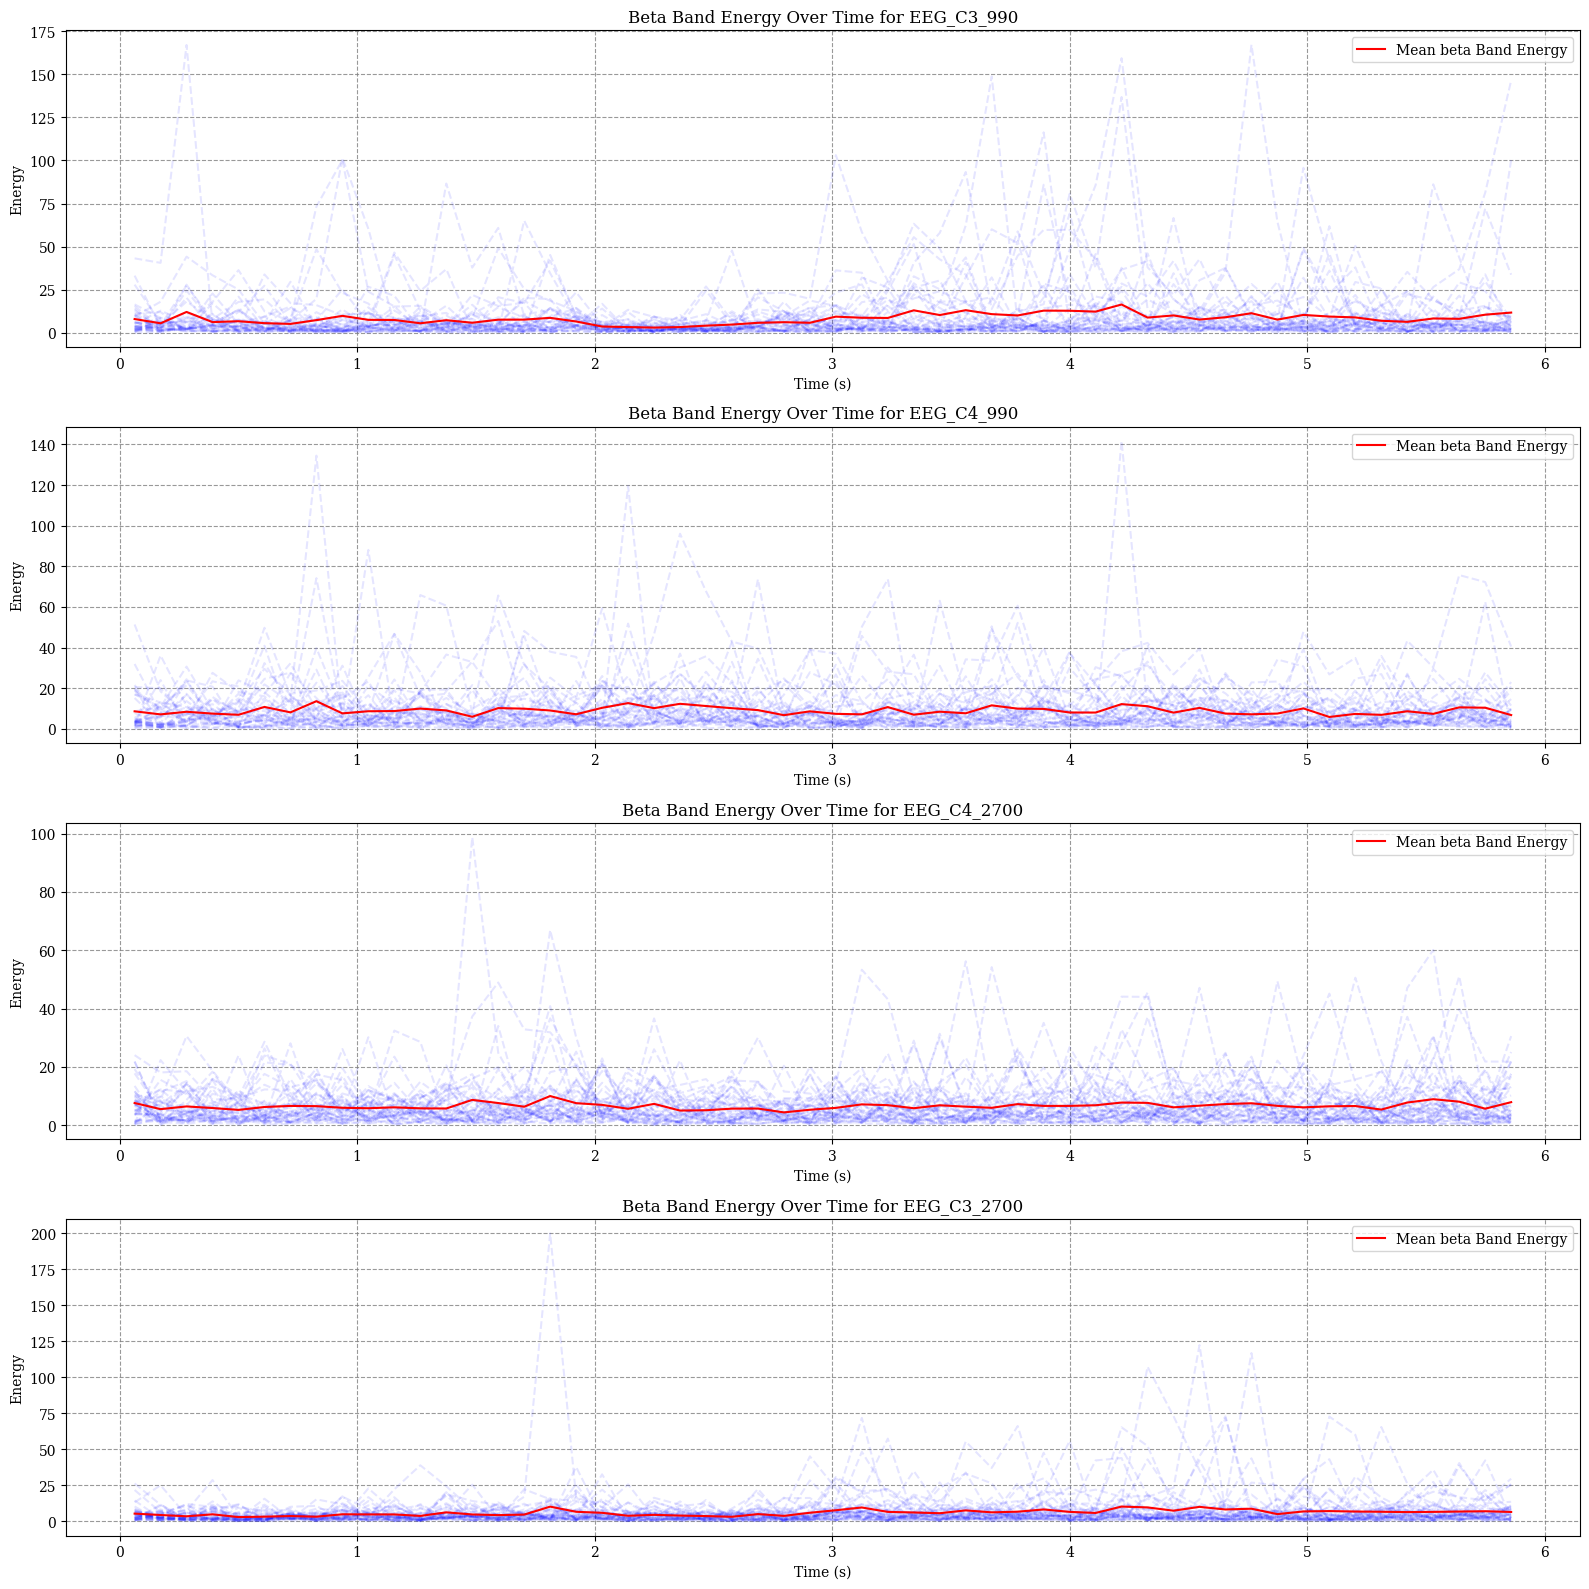

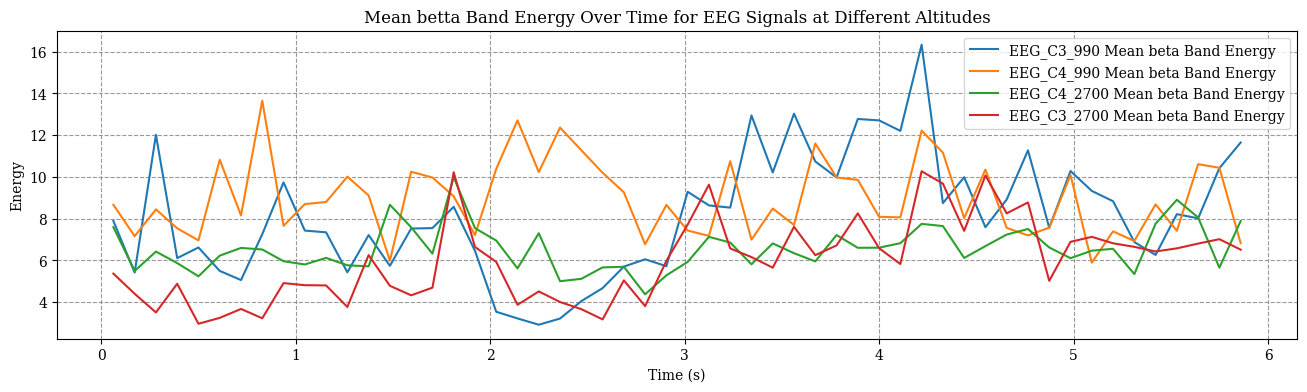

In [21]:
from scipy.signal import spectrogram, get_window

# Define the frequency range for the alpha band
alpha_band_freq_range = (8, 13)

# Define EEG signals and their altitudes
EEG_datasets = {
    'EEG_C3_990': EEG_C3_990,
    'EEG_C4_990': EEG_C4_990,
    'EEG_C4_2700': EEG_C4_2700,
    'EEG_C3_2700': EEG_C3_2700
}

# Dictionary to store mean alpha band energies for each dataset
mean_alpha_band_energies = {}

# Calculate the number of rows and columns for subplots
num_rows = len(EEG_datasets)
num_cols = 1

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16,16))

# Iterate over EEG datasets
for i, (dataset_name, signal) in enumerate(EEG_datasets.items()):
    # Initialize list to store alpha band energies for the current dataset
    all_alpha_band_energies = []
    
    # Iterate over trials in the current dataset
    for trial in signal:
        # Compute the spectrogram
        frequencies, times, Sxx = spectrogram(trial, fs=Fs, nperseg=32, nfft=trial.shape[0])
        
        # Find the indices corresponding to the alpha band frequencies
        alpha_band_indices = np.where((frequencies >= alpha_band_freq_range[0]) & (frequencies <= alpha_band_freq_range[1]))[0]
        
        # Compute the energy within the alpha band frequency range over time
        alpha_band_energy = np.sum(Sxx[alpha_band_indices, :], axis=0)/len(alpha_band_indices)
        
        # Append the alpha band energy to the list
        all_alpha_band_energies.append(alpha_band_energy)
    
    # Convert the list of alpha band energies to numpy array
    all_alpha_band_energies = np.array(all_alpha_band_energies)
    
    # Calculate the mean of alpha band energies across all trials
    mean_alpha_band_energy = np.mean(all_alpha_band_energies, axis=0)

    # Store the mean alpha band energy in the dictionary
    mean_alpha_band_energies[dataset_name] = mean_alpha_band_energy
    
    # Plot all alpha band energy curves with lower transparency
    for alpha_band_energies in all_alpha_band_energies:
        axs[i].plot(times, alpha_band_energies, 'b--' , alpha=0.1)

    # Plot the mean alpha band energy curve as the main curve
    axs[i].plot(times, mean_alpha_band_energy, color='red', label='Mean Alpha Band Energy')

    # Customize the plot
    axs[i].set_title(f'Alpha Band Energy Over Time for {dataset_name}')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Energy')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()



# Create a new figure for plotting means
plt.figure(figsize=(16, 4))

# Iterate over mean alpha band energies for each dataset
for dataset_name, mean_alpha_band_energy in mean_alpha_band_energies.items():
    plt.plot(times, mean_alpha_band_energy, label=f'{dataset_name} Mean Alpha Band Energy')

# Customize the plot
plt.title('Mean Alpha Band Energy Over Time for EEG Signals at Different Altitudes')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()





from scipy.signal import spectrogram, get_window

# Define the frequency range for the betha band
betha_band_freq_range = (14, 18)
# Define EEG signals and their altitudes
EEG_datasets = {
    'EEG_C3_990': EEG_C3_990,
    'EEG_C4_990': EEG_C4_990,
    'EEG_C4_2700': EEG_C4_2700,
    'EEG_C3_2700': EEG_C3_2700
}

# Dictionary to store mean betha band energies for each dataset
mean_betha_band_energies = {}

# Calculate the number of rows and columns for subplots
num_rows = len(EEG_datasets)
num_cols = 1

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16,16))

# Iterate over EEG datasets
for i, (dataset_name, signal) in enumerate(EEG_datasets.items()):
    # Initialize list to store betha band energies for the current dataset
    all_betha_band_energies = []
    
    # Iterate over trials in the current dataset
    for trial in signal:
        # Compute the spectrogram
        frequencies, times, Sxx = spectrogram(trial, fs=Fs,nperseg=32, nfft=trial.shape[0])
        
        # Find the indices corresponding to the betha band frequencies
        betha_band_indices = np.where((frequencies >= betha_band_freq_range[0]) & (frequencies <= betha_band_freq_range[1]))[0]
        
        # Compute the energy within the betha band frequency range over time
        betha_band_energy = np.sum(Sxx[betha_band_indices, :], axis=0)
        
        # Append the betha band energy to the list
        all_betha_band_energies.append(betha_band_energy)
    
    # Convert the list of betha band energies to numpy array
    all_betha_band_energies = np.array(all_betha_band_energies)
    
    # Calculate the mean of betha band energies across all trials
    mean_betha_band_energy = np.mean(all_betha_band_energies, axis=0)

    # Store the mean betha band energy in the dictionary
    mean_betha_band_energies[dataset_name] = mean_betha_band_energy
    
    # Plot all betha band energy curves with lower transparency
    for betha_band_energies in all_betha_band_energies:
        axs[i].plot(times, betha_band_energies, 'b--' , alpha=0.1)

    # Plot the mean betha band energy curve as the main curve
    axs[i].plot(times, mean_betha_band_energy, color='red', label='Mean beta Band Energy')

    # Customize the plot
    axs[i].set_title(f'Beta Band Energy Over Time for {dataset_name}')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Energy')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# Create a new figure for plotting means
plt.figure(figsize=(16, 4))

# Iterate over mean betha band energies for each dataset
for dataset_name, mean_betha_band_energy in mean_betha_band_energies.items():
    plt.plot(times, mean_betha_band_energy, label=f'{dataset_name} Mean beta Band Energy')

# Customize the plot
plt.title('Mean betta Band Energy Over Time for EEG Signals at Different Altitudes')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()





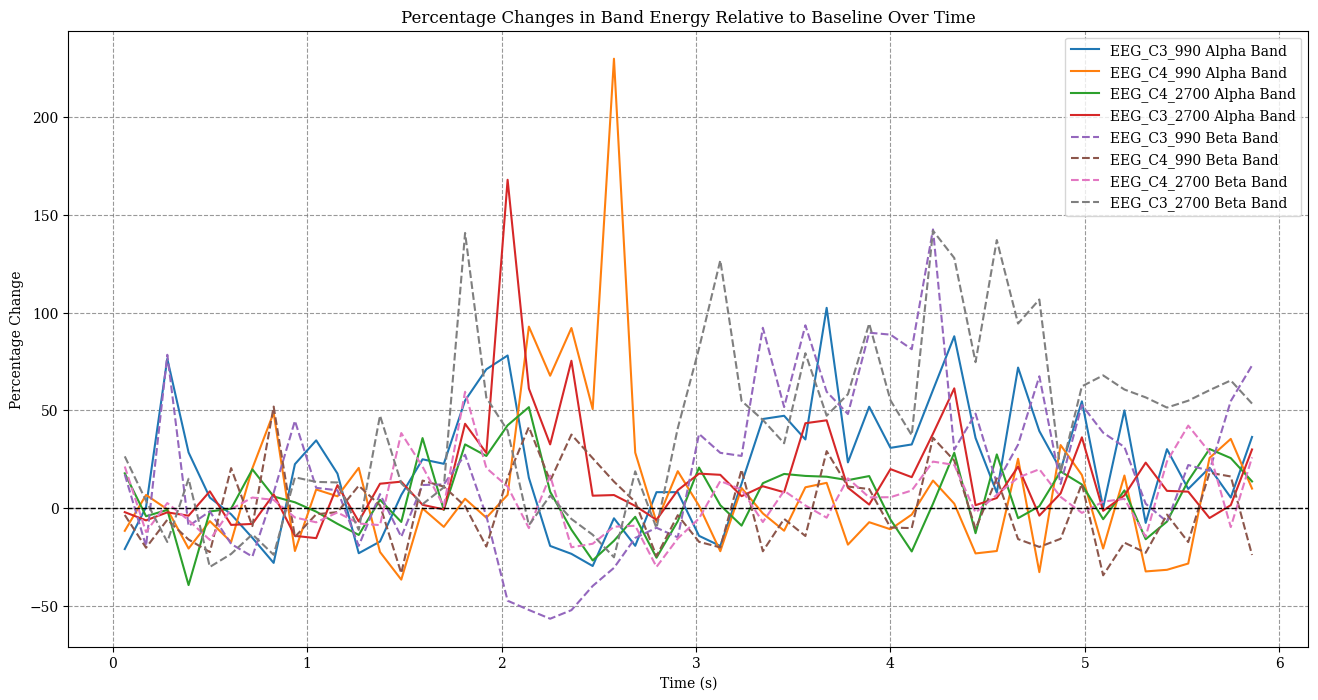

In [22]:
# Define the reference time interval
start_time_ref = 0.5  # seconds
end_time_ref = 1.5  # seconds

# Find the indices corresponding to values between 0.5 to 1.5 seconds
reference_indices = np.where((times >= start_time_ref) & (times <= end_time_ref))[0]

# Create a new figure for plotting percentage changes relative to the baseline values
plt.figure(figsize=(16, 8))

# Iterate over EEG datasets for alpha band
for dataset_name, mean_alpha_band_energy in mean_alpha_band_energies.items():
    # Calculate the baseline mean value over the reference time interval
    baseline_mean_alpha_band = np.mean(mean_alpha_band_energy[reference_indices])
    
    # Calculate the percentage change relative to the baseline
    percentage_change_alpha = ((mean_alpha_band_energy - baseline_mean_alpha_band) / baseline_mean_alpha_band) * 100
    
    # Plot the percentage change for alpha band
    plt.plot(times, percentage_change_alpha, label=f'{dataset_name} Alpha Band')

# Iterate over EEG datasets for beta band
for dataset_name, mean_beta_band_energy in mean_betha_band_energies.items():
    # Calculate the baseline mean value over the reference time interval
    baseline_mean_beta_band = np.mean(mean_beta_band_energy[reference_indices])
    
    # Calculate the percentage change relative to the baseline
    percentage_change_beta = ((mean_beta_band_energy - baseline_mean_beta_band) / baseline_mean_beta_band) * 100
    
    # Plot the percentage change for beta band
    plt.plot(times, percentage_change_beta, label=f'{dataset_name} Beta Band', linestyle='--')

# Add a horizontal line at 0 for reference
plt.axhline(0, color='k', linestyle='--', linewidth=1)

# Customize the plot
plt.title('Percentage Changes in Band Energy Relative to Baseline Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()


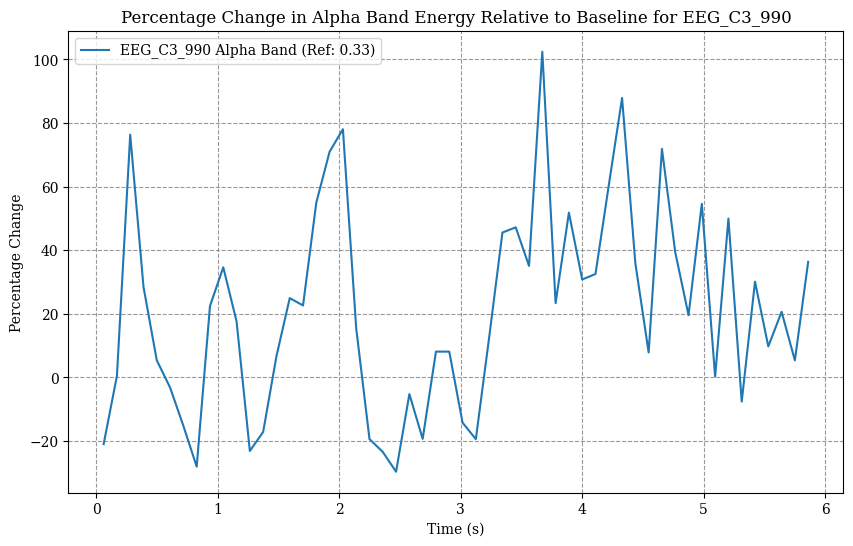

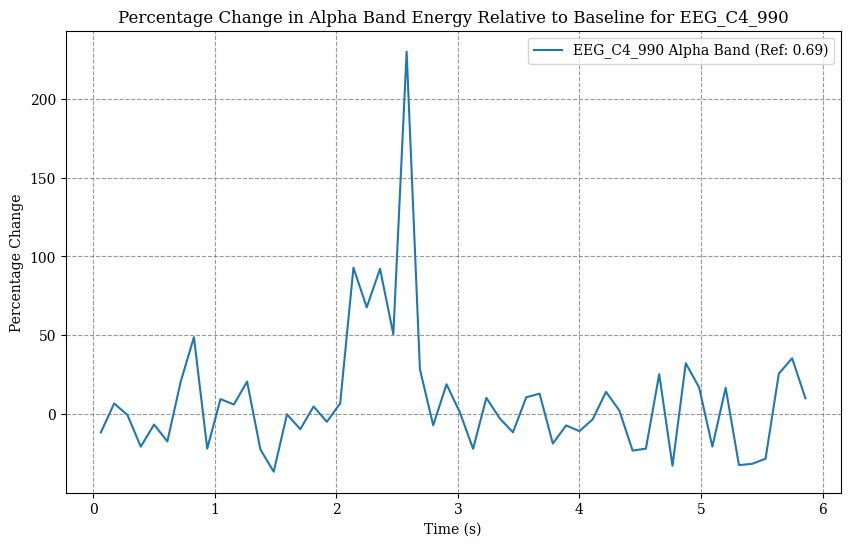

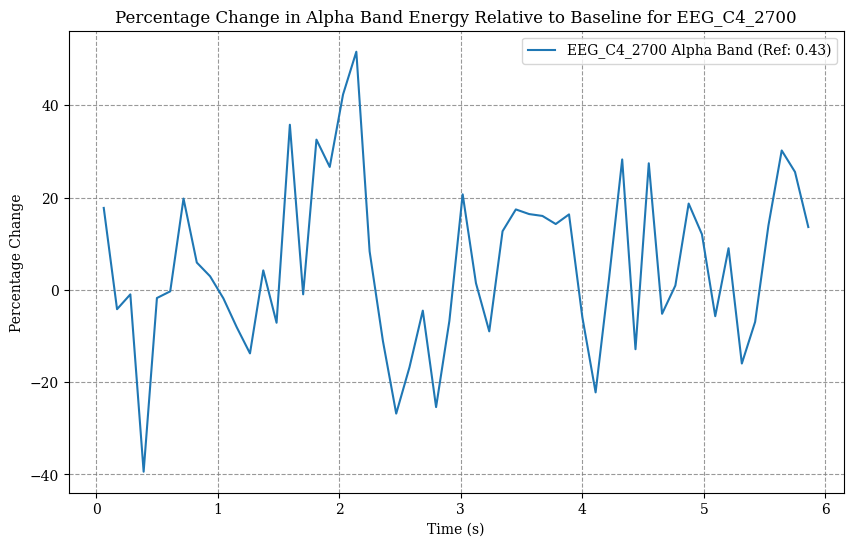

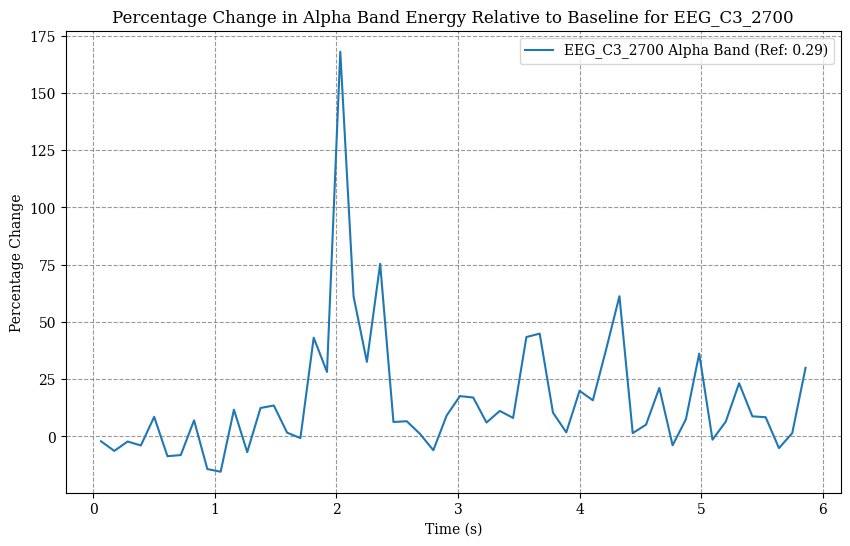

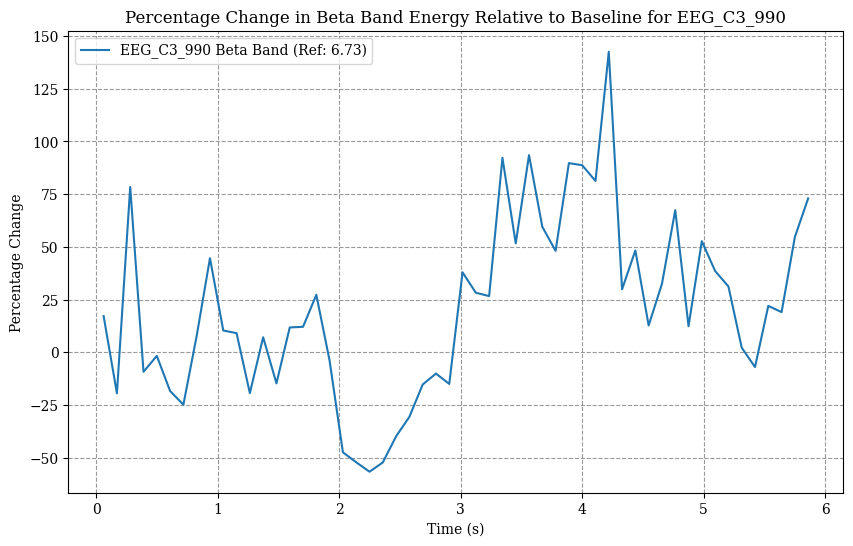

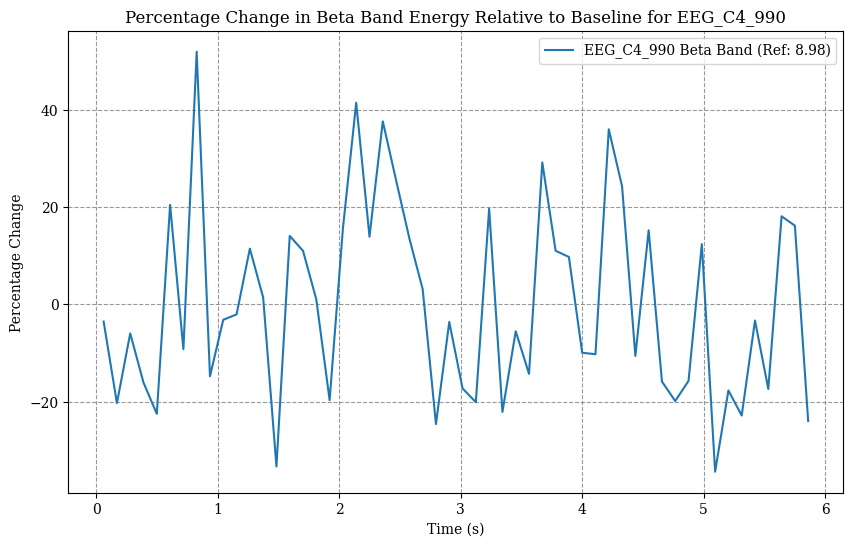

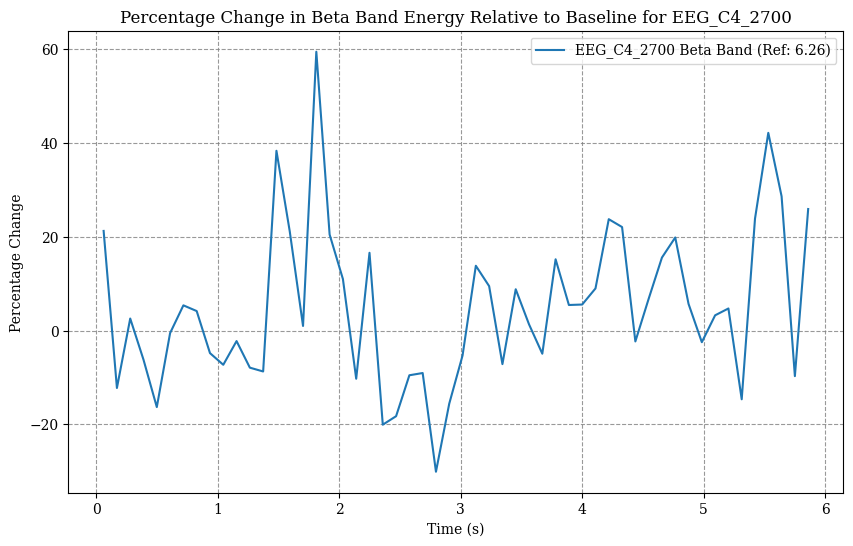

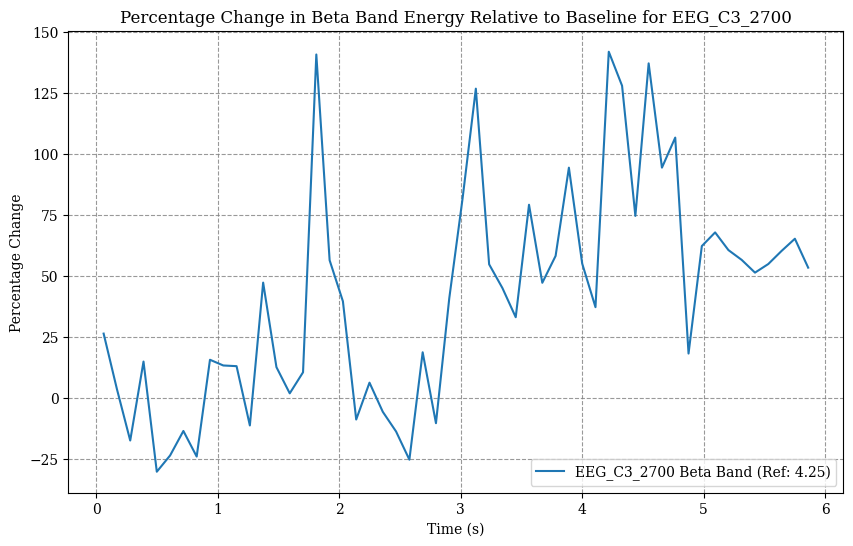

In [23]:
# Iterate over EEG datasets for alpha band
for dataset_name, mean_alpha_band_energy in mean_alpha_band_energies.items():
    # Create a new figure for plotting percentage changes relative to the baseline values
    plt.figure(figsize=(10, 6))
    
    # Calculate the baseline mean value over the reference time interval for alpha band
    baseline_mean_alpha_band = np.mean(mean_alpha_band_energy[reference_indices])
    
    # Calculate the percentage change relative to the baseline for alpha band
    percentage_change_alpha = ((mean_alpha_band_energy - baseline_mean_alpha_band) / baseline_mean_alpha_band) * 100
    
    # Plot the percentage change for alpha band
    plt.plot(times, percentage_change_alpha, label=f'{dataset_name} Alpha Band')
    
    # Customize the plot for alpha band
    plt.title(f'Percentage Change in Alpha Band Energy Relative to Baseline for {dataset_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.grid(True)
    
    # Add the reference energy value to the legend
    plt.legend([f'{dataset_name} Alpha Band (Ref: {baseline_mean_alpha_band:.2f})'])
    
    plt.show()

# Iterate over EEG datasets for beta band
for dataset_name, mean_beta_band_energy in mean_betha_band_energies.items():
    # Create a new figure for plotting percentage changes relative to the baseline values
    plt.figure(figsize=(10, 6))
    
    # Calculate the baseline mean value over the reference time interval for beta band
    baseline_mean_beta_band = np.mean(mean_beta_band_energy[reference_indices])
    
    # Calculate the percentage change relative to the baseline for beta band
    percentage_change_beta = ((mean_beta_band_energy - baseline_mean_beta_band) / baseline_mean_beta_band) * 100
    
    # Plot the percentage change for beta band
    plt.plot(times, percentage_change_beta, label=f'{dataset_name} Beta Band')
    
    # Customize the plot for beta band
    plt.title(f'Percentage Change in Beta Band Energy Relative to Baseline for {dataset_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.grid(True)
    
    # Add the reference energy value to the legend
    plt.legend([f'{dataset_name} Beta Band (Ref: {baseline_mean_beta_band:.2f})'])
    
    plt.show()


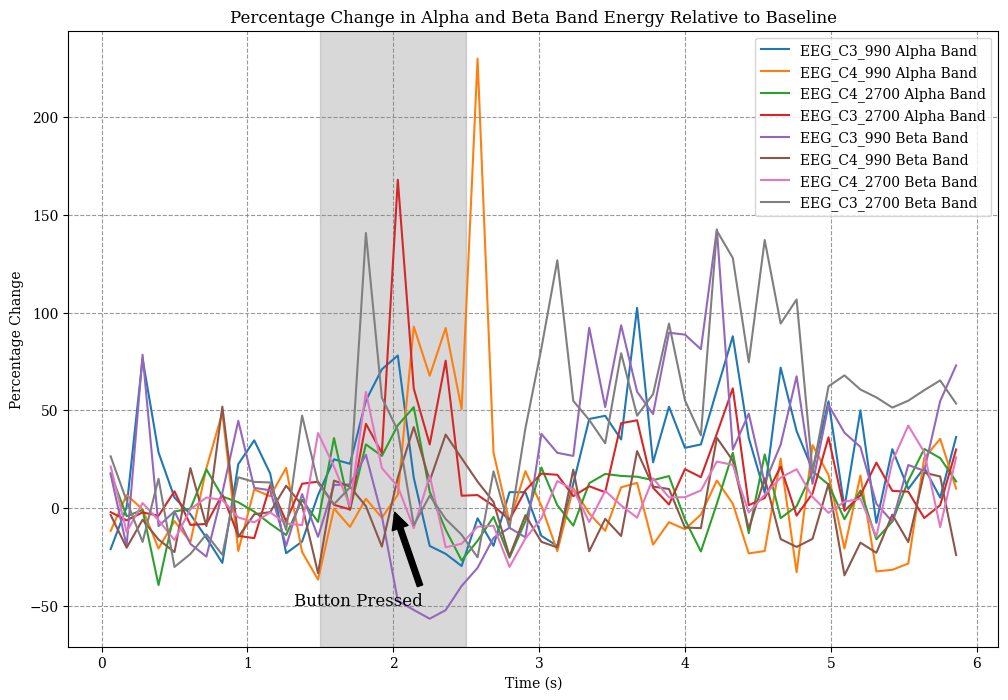

In [24]:
# Define the time interval around 2 seconds
time_interval = (1.5, 2.5)

# Create a new figure for the novel plot
plt.figure(figsize=(12, 8))

# Iterate over EEG datasets for alpha band
for dataset_name, mean_alpha_band_energy in mean_alpha_band_energies.items():
    # Calculate the percentage change relative to the baseline for alpha band
    baseline_mean_alpha_band = np.mean(mean_alpha_band_energy[reference_indices])
    percentage_change_alpha = ((mean_alpha_band_energy - baseline_mean_alpha_band) / baseline_mean_alpha_band) * 100
    
    # Plot the percentage change for alpha band
    plt.plot(times, percentage_change_alpha, label=f'{dataset_name} Alpha Band')

# Iterate over EEG datasets for beta band
for dataset_name, mean_beta_band_energy in mean_betha_band_energies.items():
    # Calculate the percentage change relative to the baseline for beta band
    baseline_mean_beta_band = np.mean(mean_beta_band_energy[reference_indices])
    percentage_change_beta = ((mean_beta_band_energy - baseline_mean_beta_band) / baseline_mean_beta_band) * 100
    
    # Plot the percentage change for beta band
    plt.plot(times, percentage_change_beta, label=f'{dataset_name} Beta Band')

# Highlight the time interval around 2 seconds
plt.axvspan(time_interval[0], time_interval[1], color='gray', alpha=0.3)

# Add annotations to describe the behavior around 2 seconds
plt.annotate('Button Pressed', xy=(2, 0), xytext=(2.2, -50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, horizontalalignment='right')

# Customize the plot
plt.title('Percentage Change in Alpha and Beta Band Energy Relative to Baseline')
plt.xlabel('Time (s)')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

plt.show()


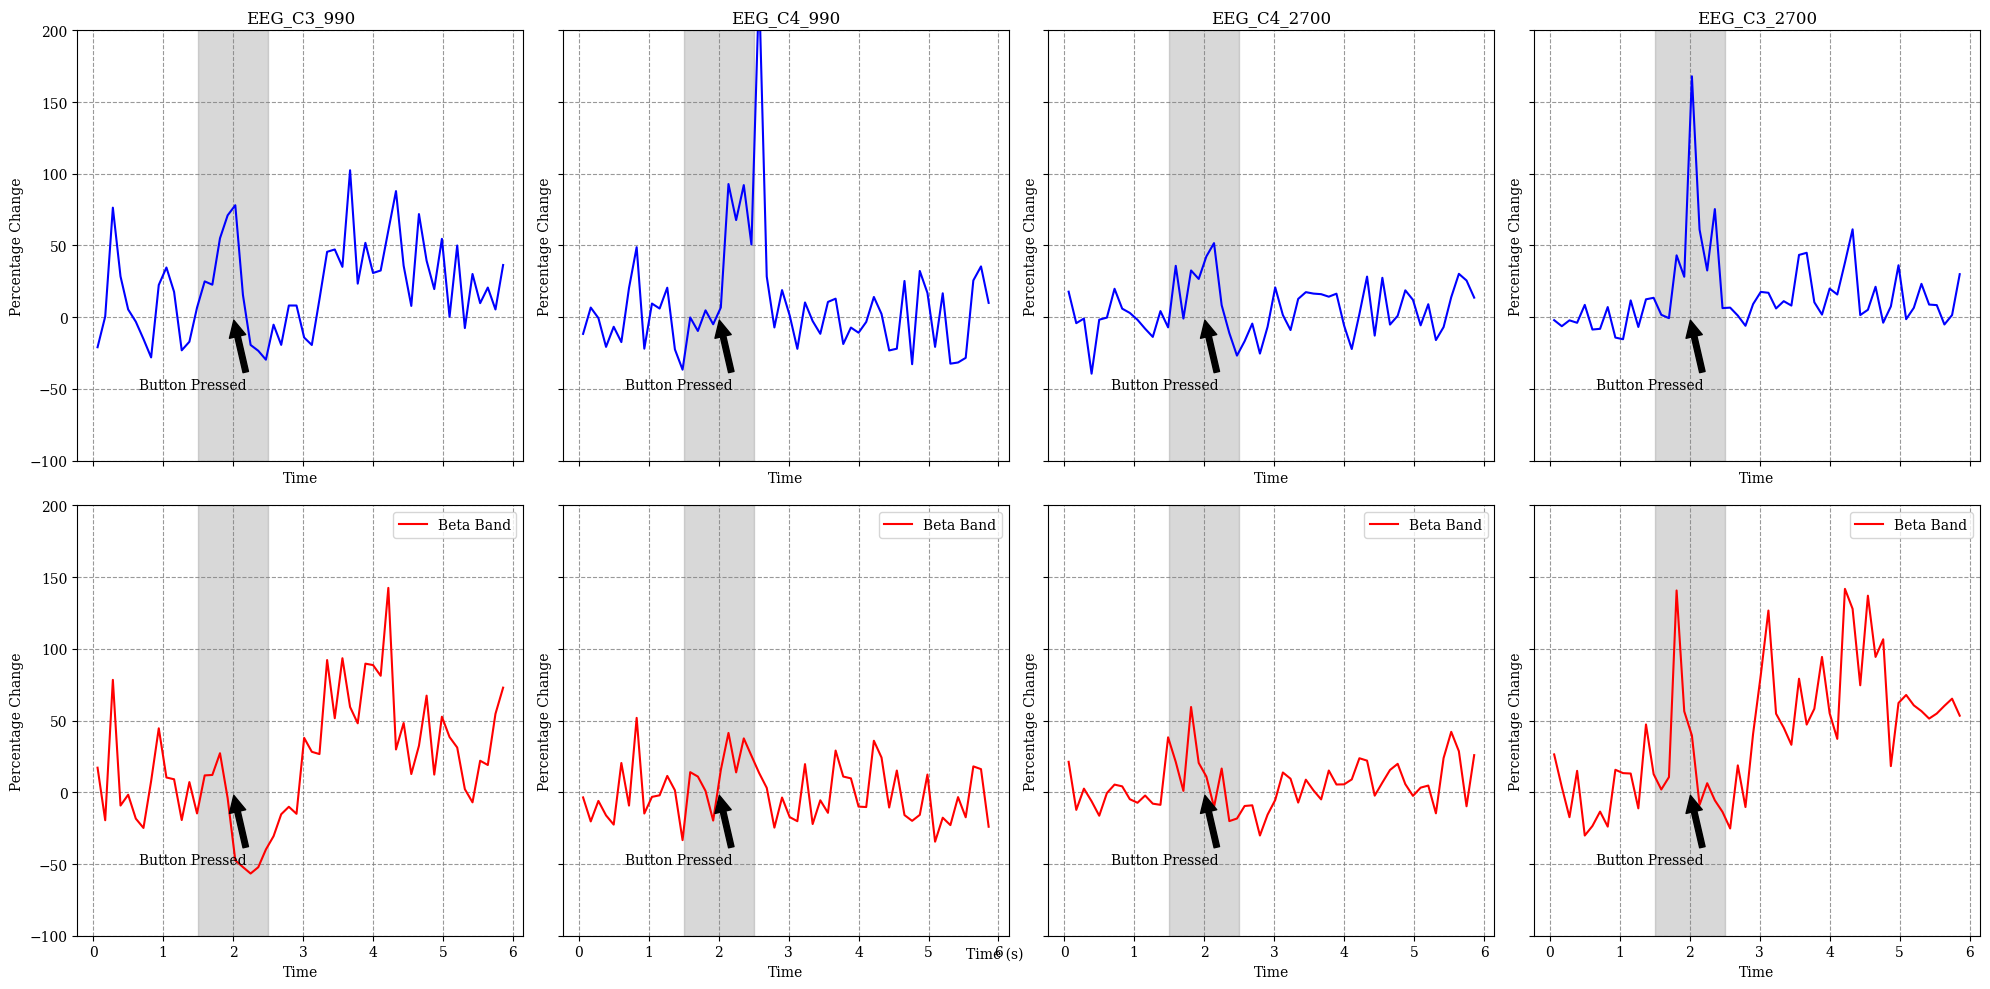

In [34]:
# Define the time interval around 2 seconds
time_interval = (1.5, 2.5)

# Create a new figure with subplots
fig, axs = plt.subplots(2, len(EEG_datasets), figsize=(20, 10), sharex=True, sharey=True)

# Iterate over EEG datasets for alpha band
for i, (dataset_name, mean_alpha_band_energy) in enumerate(mean_alpha_band_energies.items()):
    # Calculate the percentage change relative to the baseline for alpha band
    baseline_mean_alpha_band = np.mean(mean_alpha_band_energy[reference_indices])
    percentage_change_alpha = ((mean_alpha_band_energy - baseline_mean_alpha_band) / baseline_mean_alpha_band) * 100
    
    # Plot the percentage change for alpha band
    axs[0, i].plot(times, percentage_change_alpha, label='Alpha Band', color='blue')

    # Highlight the time interval around 2 seconds
    axs[0, i].axvspan(time_interval[0], time_interval[1], color='gray', alpha=0.3)

    # Add annotations to describe the behavior around 2 seconds
    axs[0, i].annotate('Button Pressed', xy=(2, 0), xytext=(2.2, -50),
                       arrowprops=dict(facecolor='black', shrink=0.05),
                       fontsize=10, horizontalalignment='right')

    # Customize subplot
    axs[0, i].set_title(f'{dataset_name}')
    axs[0, i].grid(True)
    axs[0, i].set_ylim(-100, 200)
    axs[0, i].set_ylabel("Percentage Change")
    axs[0, i].set_xlabel("Time")



# Iterate over EEG datasets for beta band
for i, (dataset_name, mean_beta_band_energy) in enumerate(mean_betha_band_energies.items()):
    # Calculate the percentage change relative to the baseline for beta band
    baseline_mean_beta_band = np.mean(mean_beta_band_energy[reference_indices])
    percentage_change_beta = ((mean_beta_band_energy - baseline_mean_beta_band) / baseline_mean_beta_band) * 100
    
    # Plot the percentage change for beta band
    axs[1, i].plot(times, percentage_change_beta, label='Beta Band', color='red')

    # Highlight the time interval around 2 seconds
    axs[1, i].axvspan(time_interval[0], time_interval[1], color='gray', alpha=0.3)

    # Add annotations to describe the behavior around 2 seconds
    axs[1, i].annotate('Button Pressed', xy=(2, 0), xytext=(2.2, -50),
                       arrowprops=dict(facecolor='black', shrink=0.05),
                       fontsize=10, horizontalalignment='right')

    # Customize subplot
    axs[1, i].grid(True)
    axs[1, i].set_ylim(-100, 200)
    axs[1, i].legend()
    axs[1, i].set_ylabel("Percentage Change")
    axs[1, i].set_xlabel("Time")





# Set common labels
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


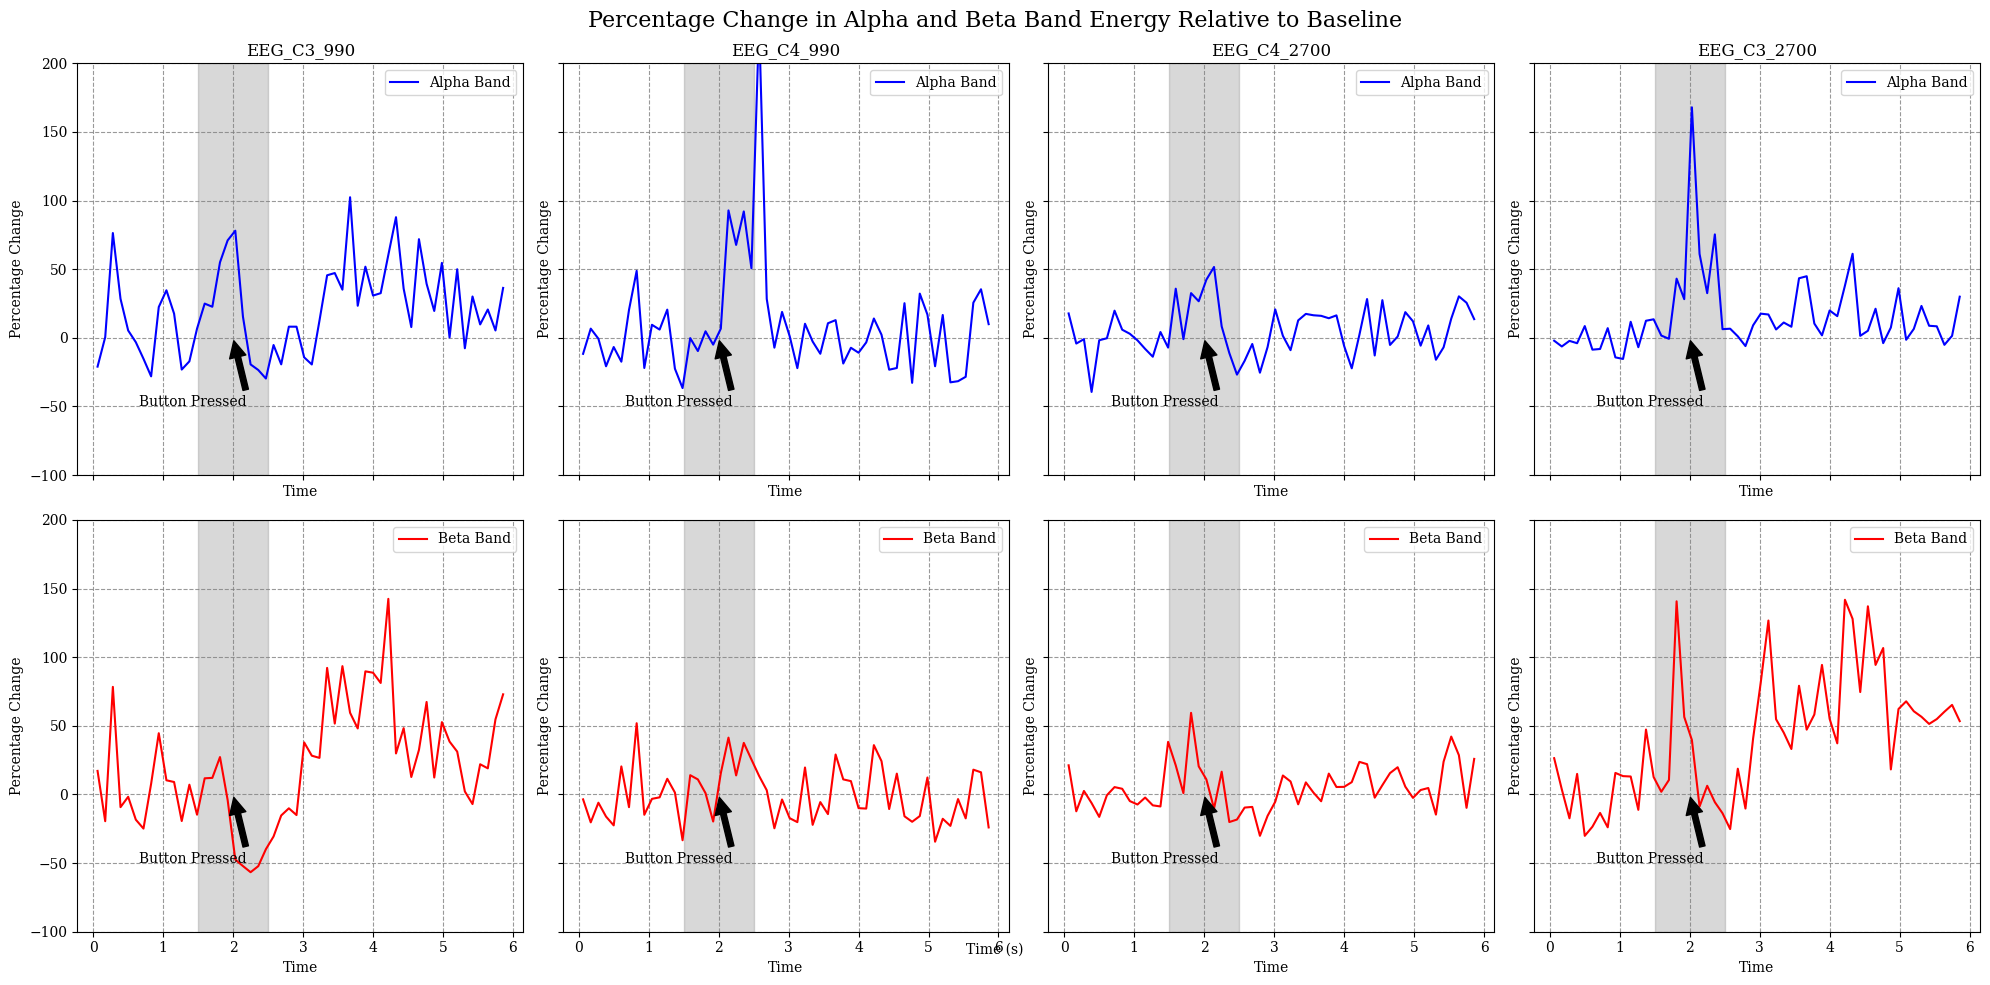

In [37]:
# Define the time interval around 2 seconds
time_interval = (1.5, 2.5)

# Create a new figure with subplots
fig, axs = plt.subplots(2, len(EEG_datasets), figsize=(20, 10), sharex=True, sharey=True)

# Iterate over EEG datasets for alpha band
for i, (dataset_name, mean_alpha_band_energy) in enumerate(mean_alpha_band_energies.items()):
    # Calculate the percentage change relative to the baseline for alpha band
    baseline_mean_alpha_band = np.mean(mean_alpha_band_energy[reference_indices])
    percentage_change_alpha = ((mean_alpha_band_energy - baseline_mean_alpha_band) / baseline_mean_alpha_band) * 100
    
    # Plot the percentage change for alpha band
    axs[0, i].plot(times, percentage_change_alpha, label='Alpha Band', color='blue')

    # Highlight the time interval around 2 seconds
    axs[0, i].axvspan(time_interval[0], time_interval[1], color='gray', alpha=0.3)

    # Add annotations to describe the behavior around 2 seconds
    axs[0, i].annotate('Button Pressed', xy=(2, 0), xytext=(2.2, -50),
                       arrowprops=dict(facecolor='black', shrink=0.05),
                       fontsize=10, horizontalalignment='right')

    # Customize subplot
    axs[0, i].set_title(f'{dataset_name}')
    axs[0, i].grid(True)
    axs[0, i].set_ylim(-100, 200)
    axs[0, i].set_ylabel("Percentage Change")
    axs[0, i].set_xlabel("Time")
    axs[0, i].legend()

# Iterate over EEG datasets for beta band
for i, (dataset_name, mean_beta_band_energy) in enumerate(mean_betha_band_energies.items()):
    # Calculate the percentage change relative to the baseline for beta band
    baseline_mean_beta_band = np.mean(mean_beta_band_energy[reference_indices])
    percentage_change_beta = ((mean_beta_band_energy - baseline_mean_beta_band) / baseline_mean_beta_band) * 100
    
    # Plot the percentage change for beta band
    axs[1, i].plot(times, percentage_change_beta, label='Beta Band', color='red')

    # Highlight the time interval around 2 seconds
    axs[1, i].axvspan(time_interval[0], time_interval[1], color='gray', alpha=0.3)

    # Add annotations to describe the behavior around 2 seconds
    axs[1, i].annotate('Button Pressed', xy=(2, 0), xytext=(2.2, -50),
                       arrowprops=dict(facecolor='black', shrink=0.05),
                       fontsize=10, horizontalalignment='right')

    # Customize subplot
    axs[1, i].grid(True)
    axs[1, i].set_ylim(-100, 200)
    axs[1, i].legend()
    axs[1, i].set_ylabel("Percentage Change")
    axs[1, i].set_xlabel("Time")

# Set common labels
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')

# Add a title to the figure
fig.suptitle('Percentage Change in Alpha and Beta Band Energy Relative to Baseline', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


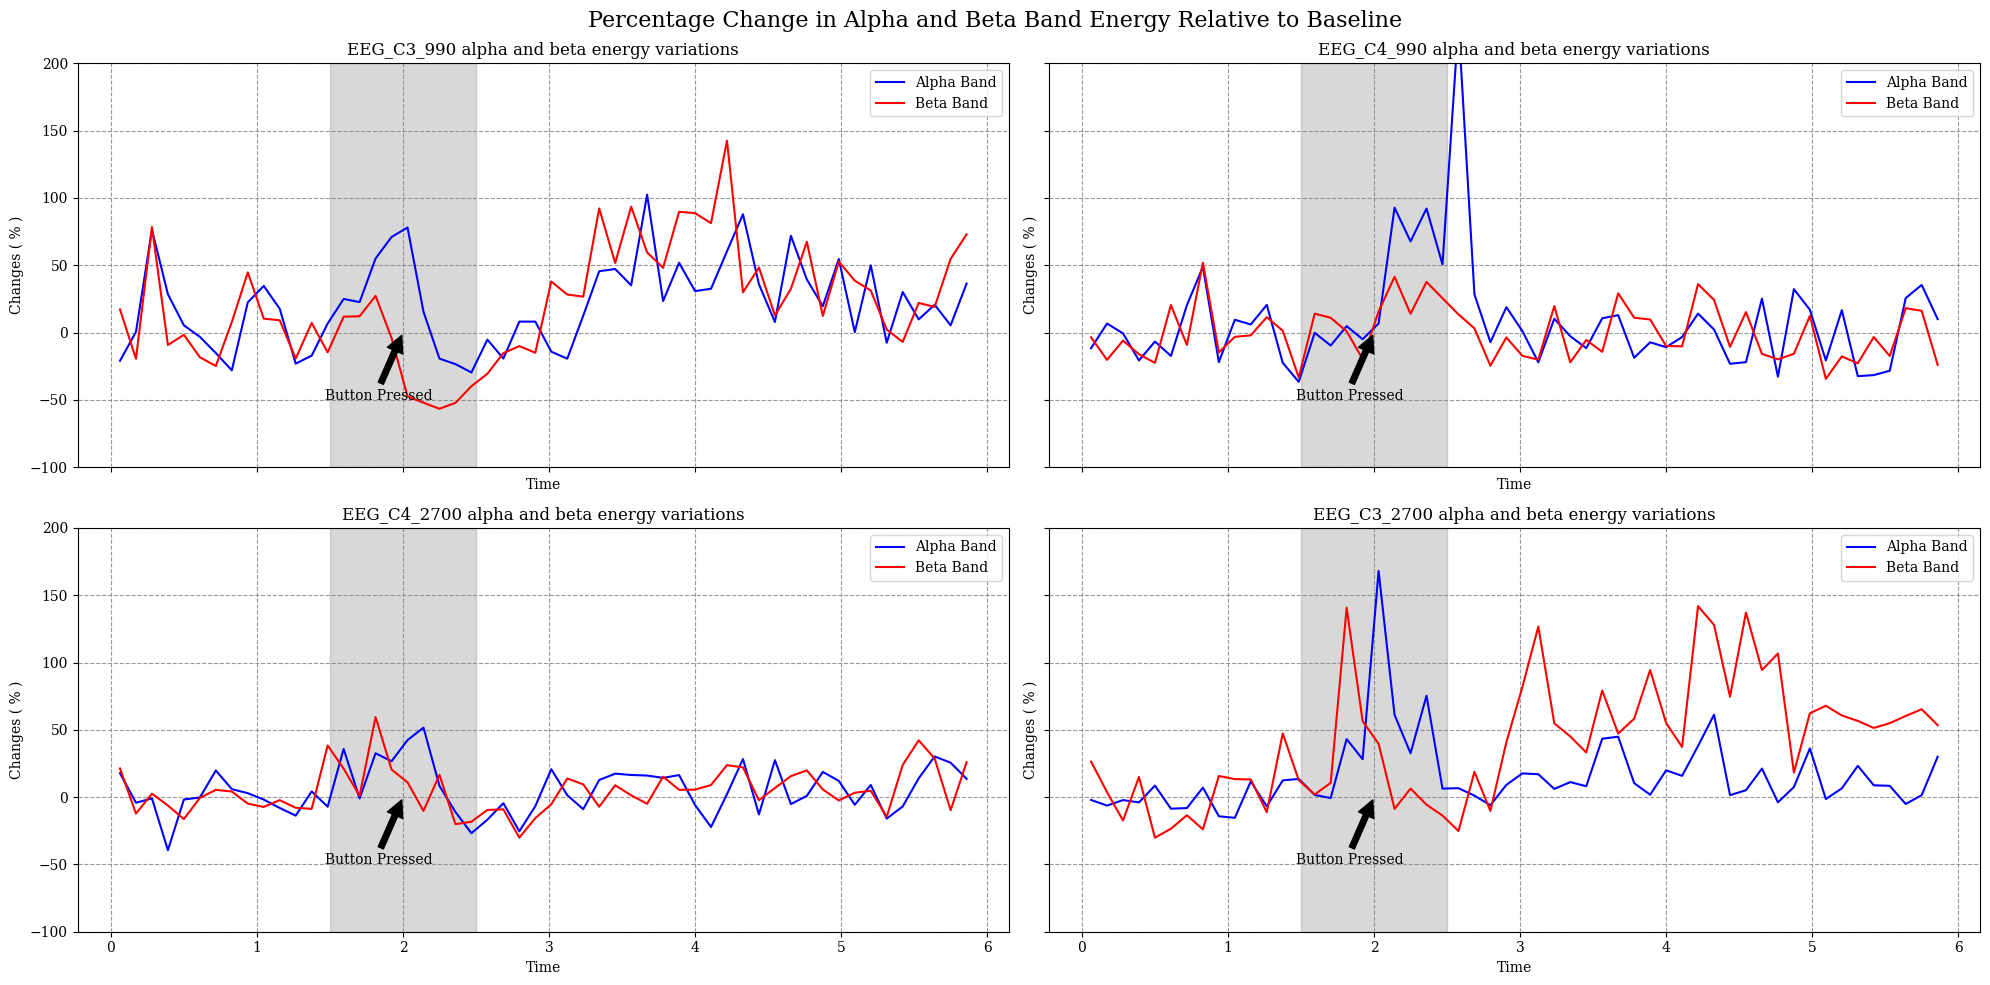

In [42]:
# Sort EEG datasets based on altitude
sorted_EEG_datasets = sorted(EEG_datasets.items(), key=lambda x: int(x[0].split('_')[-1]))

# Create a new figure with subplots
fig, axs = plt.subplots(2, len(EEG_datasets)//2, figsize=(20, 10), sharex=True, sharey=True)

# Iterate over EEG datasets for alpha band
for i, ((dataset_name, mean_alpha_band_energy), (dataset_name_beta, mean_beta_band_energy)) in enumerate(zip(mean_alpha_band_energies.items(), mean_betha_band_energies.items())):
    # Calculate the percentage change relative to the baseline for alpha band
    baseline_mean_alpha_band = np.mean(mean_alpha_band_energy[reference_indices])
    percentage_change_alpha = ((mean_alpha_band_energy - baseline_mean_alpha_band) / baseline_mean_alpha_band) * 100
    
    # Calculate the percentage change relative to the baseline for beta band
    baseline_mean_beta_band = np.mean(mean_beta_band_energy[reference_indices])
    percentage_change_beta = ((mean_beta_band_energy - baseline_mean_beta_band) / baseline_mean_beta_band) * 100
    
    # Determine the position of subplot
    row = i // (len(EEG_datasets)//2)
    col = i % (len(EEG_datasets)//2)

    # Plot the percentage change for alpha band
    axs[row, col].plot(times, percentage_change_alpha, label='Alpha Band', color='blue')

    # Plot the percentage change for beta band
    axs[row, col].plot(times, percentage_change_beta, label='Beta Band', color='red')

    # Highlight the time interval around 2 seconds
    axs[row, col].axvspan(time_interval[0], time_interval[1], color='gray', alpha=0.3)

    # Add annotations to describe the behavior around 2 seconds
    axs[row, col].annotate('Button Pressed', xy=(2, 0), xytext=(2.2, -50),
                       arrowprops=dict(facecolor='black', shrink=0.05),
                       fontsize=10, horizontalalignment='right')

    # Customize subplot
    axs[row, col].set_title(f'{dataset_name}'+ ' alpha and beta energy variations')
    axs[row, col].grid(True)
    axs[row, col].set_ylim(-100, 200)
    axs[row, col].set_ylabel("Changes ( % )")
    axs[row, col].set_xlabel("Time")
    axs[row, col].legend()



# Add a title to the figure
fig.suptitle('Percentage Change in Alpha and Beta Band Energy Relative to Baseline', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
